<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #4040a1;"> 

<h1 style="color:#f0f0f0">ASI Assessed exercise</h1>
<p style="font-size: 150%;color:#f0f0f0">Image classification by using Naive Bayes and Linear regression</p></div>


<div class="alert" style='margin-top: 0px; border-top:0px; padding-top: 10px; padding-left: 70%; background-color:#fefbd8'>
  <p style="text-align:left;font-size: 120% "><strong>Student: Than Thanh An</strong></p>
  <p> Email: than@eurecom.fr </p>
</div>


<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0"> Manual Instruction  </h1>
</div>

In this notebook, the data will be downloaded and put into the right folder in first session. That means you just run sequentially the cell and it will work. For bonus session, you need to follow the instruction below to download the extracted feature and put it into right folder. 

This report contains files as follow:
- 3 notebooks: a final report and 2 feature extractions model for bonus session
- *mnist.py* and *cifar.py*: 2 dataset loading function
- *preprocess.py* : contain data preprocess function 
- *bayesClasifer.py* and *linearRegression.py*: contain implementation Naive Bayes, Bayes Classifer, Bayesian Linear regression and Logistic Regression
- *evaluationMetrics.py*: contain functions which are used to evaluate model.


<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0">I. Data Extraction - Brief Analysis </h1>
</div>

## 1.1 *Download the MNIST and CIFAR10 datasets and import them*
--------------------------

In [3]:
from IPython.display import clear_output

# 1. Download data
# MNIST
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
# CIFAR
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

clear_output()

In [5]:
# 2. Create data folder and move data into 
!mkdir data
!mkdir data/mnist
!mv *-ubyte.gz data/mnist
!mv cifar-10-python* data

clear_output()

In [ ]:
# 3. Unzip data 
!gzip -df data/mnist/train-images-idx3-ubyte.gz
!gzip -df data/mnist/t10k-images-idx3-ubyte.gz
!gzip -df data/mnist/train-labels-idx1-ubyte.gz
!gzip -df data/mnist/t10k-labels-idx1-ubyte.gz
!tar -zxvf data/cifar-10-python.tar.gz

clear_output()

In [6]:
# Self-implimentation module
import mnist as MNT
import cifar as CIFAR
from bayesClassifier import *
from preprocess import *

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib 
from matplotlib import gridspec
%matplotlib inline

# utilit
from collections import Counter
import importlib
import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


#### *Load CIFAR10 dataset*

In [23]:
# CIFAR data 
training_cifar_images = np.empty(shape=(1,32,32,3))
training_cls = np.array([])
directoryPath = "./data/cifar-10-batches-py/"

# Training data
begin = 0
for i in range(5):
    # Load the images and class-numbers from the data-file.
    images_batch, cls_batch = CIFAR._load_data(filename=directoryPath + "data_batch_" + str(i + 1))
    # Number of images in this batch.
    num_images = len(images_batch)
    # End-index for the current batch.
    end = begin + num_images
    # Store the images into the array.
    training_cifar_images = np.concatenate([training_cifar_images,images_batch])
    # Store the class-numbers into the array.
    training_cls = np.concatenate([training_cls,cls_batch])
    # The begin-index for the next batch is the current end-index.
    begin = end

training_cifar_images = training_cifar_images[1:,:] 
training_cls = training_cls.astype(int)
testing_cifar_images, testing_cls = CIFAR._load_data(filename=directoryPath + "test_batch")
cifar_class_name = [x.decode('utf-8') for x in CIFAR._unpickle(directoryPath +"batches.meta")[b'label_names']]
del images_batch,num_images

#### *Load MNIST dataset*

In [7]:
# MNIST LOADING 
training_mnist = list(MNT.read(dataset='training', path='./data/mnist'))
test_mnist = list(MNT.read(dataset='testing',path='./data/mnist'))

training_mnist_data = np.array(list(map(lambda x: x[1],training_mnist)))
training_mnist_labels = np.array(list(map(lambda x: x[0],training_mnist)))
testing_mnist_data = np.array(list(map(lambda x: x[1],test_mnist)))
testing_mnist_labels = np.array(list(map(lambda x: x[0],test_mnist)))
del training_mnist,test_mnist

## 1.2 *Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis*
--------------------------

In [17]:
def DistributionLabel(labels,ax):
    # histogram
    labels = np.array(labels).astype(int)
    his = np.bincount(labels)
    bins = np.arange(len(his))
    
    # plot 
    plt.gca()
    plt.title("distribution of the label",fontsize=20)
    offset = .4
    ax.bar(bins,his)
    ax.set_xticks(bins + offset)
    ax.set_xticklabels(bins)

Number of training set:  50000
Dimension of sample:  (32, 32, 3)


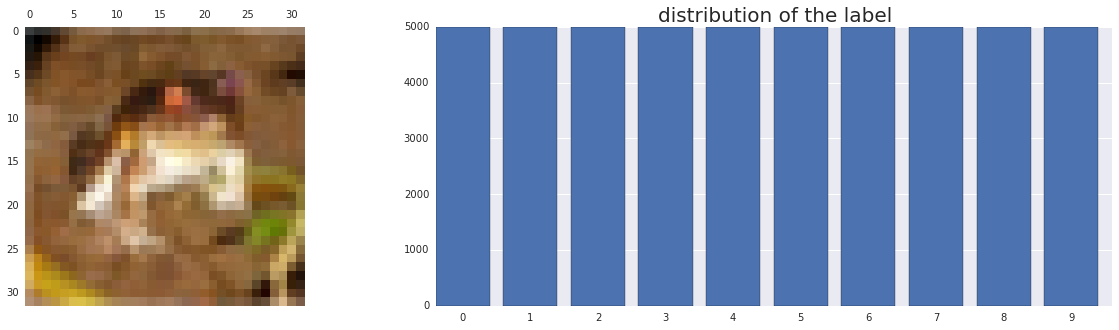

In [30]:
# sample from cifar
plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

ax = plt.subplot(gs[0])
MNT.show(training_cifar_images[0],ax)

ax = plt.subplot(gs[1])
DistributionLabel(training_cls,ax)

print("Number of training set: ", len(training_cifar_images))
print("Dimension of sample: ",np.shape(training_cifar_images[0]))

Number of training set:  60000
Dimension of sample:  (28, 28)


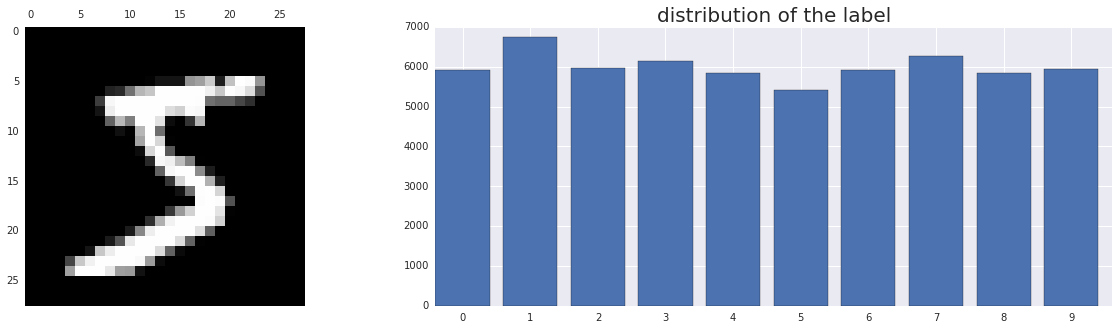

In [31]:
# sample from MNIST
plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

ax = plt.subplot(gs[0])
pixels = training_mnist_data[0]
MNT.show(pixels,ax)

ax = plt.subplot(gs[1])
DistributionLabel(training_mnist_labels,ax)

print("Number of training set: ", len(training_mnist_data))
print("Dimension of sample: ",pixels.shape)

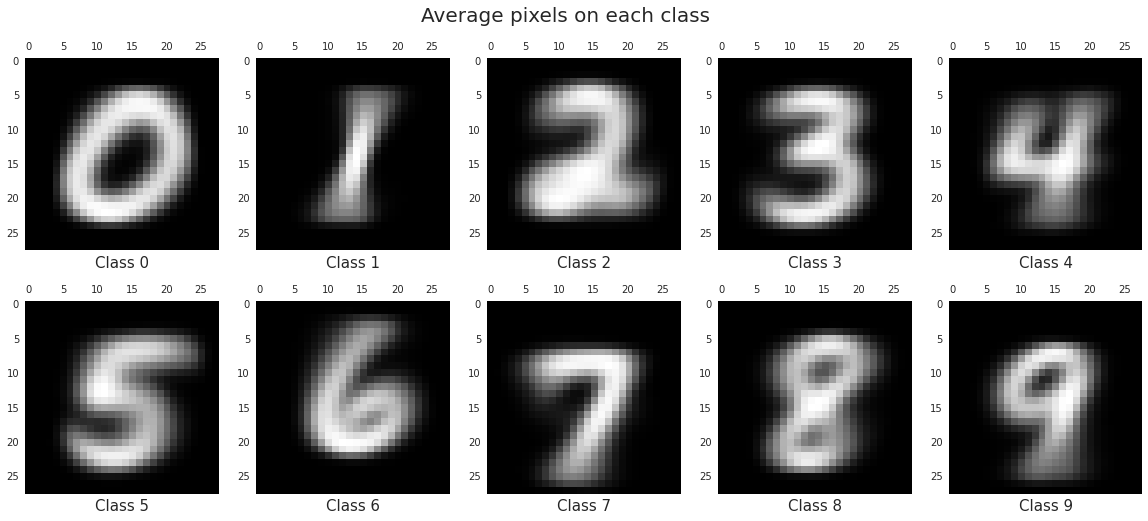

In [32]:
plt.figure(figsize=(20,8))
plt.suptitle('Average pixels on each class',fontsize=20)

for i in range(10):
    ax = plt.subplot(2,5,i+1)
    idx = training_mnist_labels==i
    MNT.show(np.sum(training_mnist_data[idx],axis=0)/np.sum(idx),ax=ax)
    ax.set_xlabel('Class %d'%(i),fontsize=15)
plt.show()

#### COMMENT


<div class="alert alert-info" style="text-align:justify">
The brief description for our data:
<br>
- MNIST: Gray-scale image with black background. The distribution of data over the class are not same but there is not much different between them. 
<br>- CIFAR: 2D image with 3 color kernel. The distribution of data over the class are same but the quality of image is not good. We cannot see clearly the object. Furthermore, the object is not invariant in position. 
<br><br>
In addition, in case there is a class has more training data than others so it may cause our classifier may be not helpful. For example, we try to predict the patient has a disease or not (99% of patients do not have disease (+) and 1% of p patients have a disease (-). So if our classifer only predict as (+) so we obtains 99% accuracy but the classifer now is useless. As we already learnt, in Naive Bayes, $p(t=i|x_{new},X,t) \propto p(x_{new}|X,t)*p(t=i)$ so if our prior ($p(t=i)$) has high different between class so our classifier tend to predict the class with high probability in training but it may not happens in testing. So that is why in our NB we will set uniform prior.</div>

<br>
<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0">II. Classification - Naïve Bayes classifier</h1></div>

In this session, I implement *Gaussian Naive Bayes* algorithm for classification in multiple way to compare the performance in speed and accuracy (The implimentation in "bayesClassifer.py"). At frist, look at some statistic about our data

In [33]:
print(NaiveBayesClassifier.__doc__)

Naive Bayesian Classifer
        Note:
            Initialization
        Args:
            data: Training data - 2D array Image
            labels: Training label - 1D array and numberical data
            bClassPrior: Using uniform distribution (TRUE) or prior distribution from dataset (FALSE)
            bRmUseless: Reduce dimension by variances or not
            iRmThreshold: Threshold for variances in dimension reduction
            smoothing: Coefficient to smooth variances 
    


In [34]:
model = NaiveBayesClassifier(training_mnist_data,training_mnist_labels,bRmUseless=False)

In [35]:
countZeroStd = []
for i in range(10):
    countZeroStd.append(np.sum(model.componentPrior[i][1]==0))
pd.DataFrame([np.arange(10),countZeroStd],index=['classID','Number of zero var'])

,0,1,2,3,4,5,6,7,8,9
classID,0,1,2,3,4,5,6,7,8,9
Number of zero var,219,201,173,199,193,197,224,200,224,233


#### COMMENT

Table shows number of pixels its variance equal to 0 in each class. Why do we need to take care this problem? 

![](http://scikit-learn.org/stable/_images/math/201f076a3330f2928c26978c4eac59cc8ba4a440.png)

* Reminding quickly above naive bayes classifer. Under independence assumption, our posterior is a product of the likelihood of $P(x_i|y)$, which is assumed to be gaussian (below). In case, $\sigma$ (standard deviation) is 0, our pdf will be 0 ($x != mean$) or inf ($x = mean$). That means, all of our posterior will become to inf in this case because of black region of the image whose variance equal 0 over all class. We should find a way to avoid this problem.

![](http://scikit-learn.org/stable/_images/math/ed0c1181c1696f72e1be266187e4694919047d9e.png)

* One of the beginning idea is I put small value (1e-5) to variance to obtains pdf. However, it rises another problem. pdf value in case x=mean will be really large. As you can see from table, numbers of pixel whose variance is 0 are different over the class. That means the class have more those pixels have more advantage when classify the image that contains more black region that make our results really bad. 


* That leads us 2 options to solve this problem:
    - **First Method**: we can skip to product likelihood its variance = 0 (that means its pdf = 1). One of the problem of this method is same as the problem we mentioned above, if the class has more zero variance pixel, it may have more advantage in likelihood compared with other class has less zero variance pixel.
    - **Second Method**: add a smoothing factor to the variance vector. $var = var + c$ with c is smoothing factor. With c is large enough, we will reduce different of pdf when x equal and not equal to the mean. It will lighten our problem I mentioned above. However, value of smoothing is too large can affect to other dimension whose variance does not equal to 0. In this case, it is a parameter we need to find to obtain the best result.
    - **Third Method**: we can remove all pixels its variance is small across all classes. It has lots of advantages, reducing dimensions to obtain higher speed performance and being able to combining with 2 methods I mentioned above.  
    

### 2.1 *Remove dimensions by its variance - Data Preprocessing*
--------------------------
One of the way to reduce dimension is to remove all pixels its variance is small across all classes. It not only improve performance but also avoid the problem of black region in MNIST dataset.

In [10]:
threshold = [1e-2,1,10,100,500,1000]
newDim = []
delDim = []
for i in threshold:
    model = NaiveBayesClassifier(training_mnist_data,training_mnist_labels,bRmUseless=True,iRmThreshold=i)
    newDim.append(model.nDim)
    delDim.append(model.del_ind)
pd.DataFrame([threshold,newDim],index=['threshold','Number of remain dimensions'])

,0,1,2,3,4,5
threshold,0.01,1,10,100,500,1000
Number of remain dimensions,713.00,661,611,522,454,412


#### COMMENT
<div class="alert alert-info" style="text-align:justify">
This tables shows you number dimension when change the threshold of variance. To see which value is good, I will visualize the remove region of each case.</div>

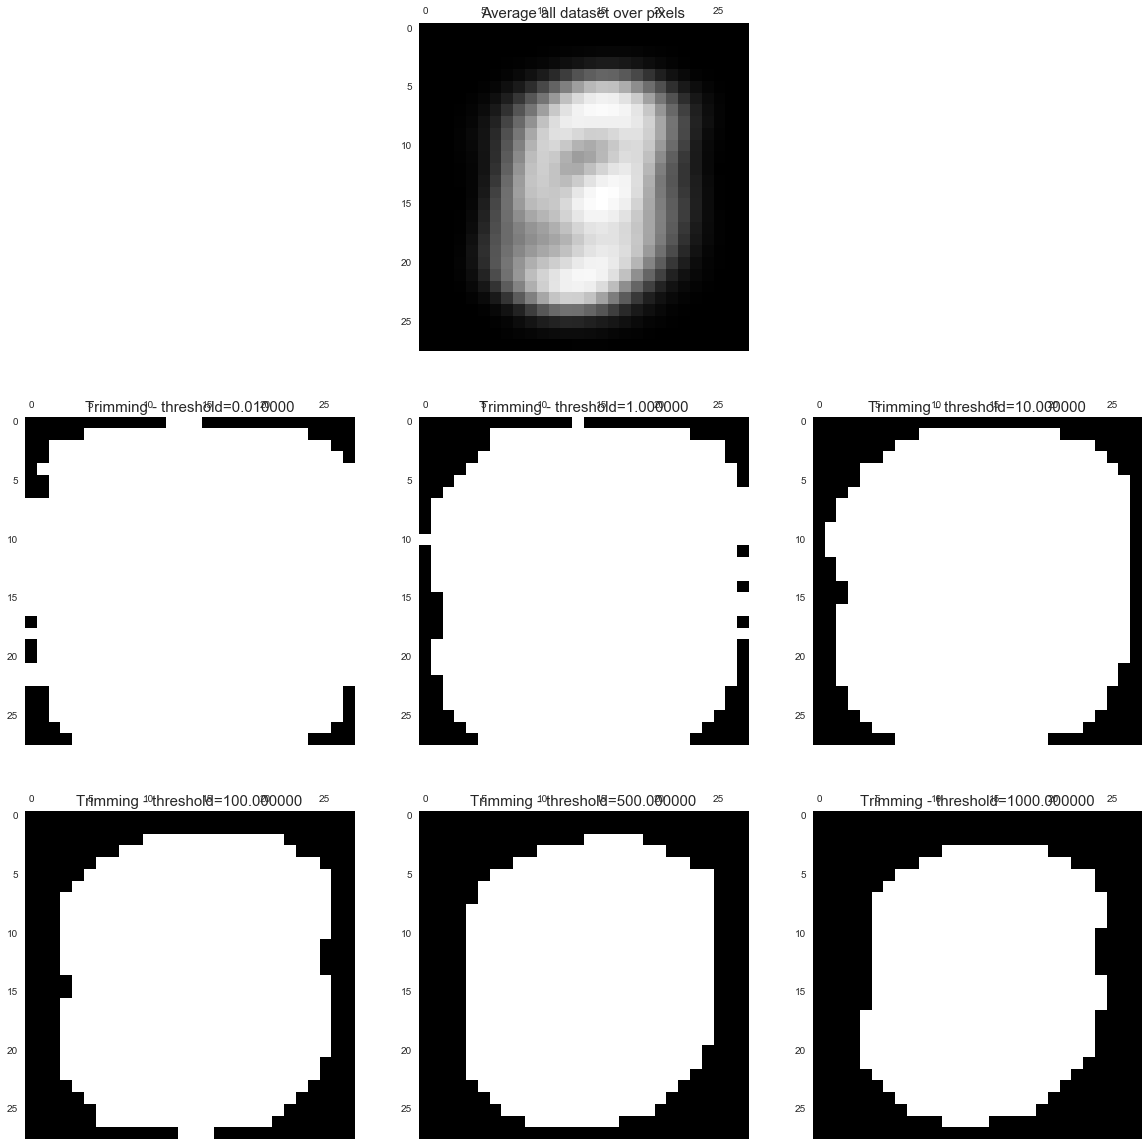

In [11]:
plt.figure(figsize=(20,20))
ax = plt.subplot(3,1,1)
MNT.show(np.sum(training_mnist_data,axis=0)/50000,ax=ax)
ax.set_title('Average all dataset over pixels',fontsize=15)

for i in range(len(threshold)):
    ax = plt.subplot(3,3,i+4)
    mask = np.ones(784)*255
    mask[delDim[i]] = 0
    MNT.show(mask.reshape([28,28]),ax=ax)
    ax.set_title('Trimming - threshold=%f'%(threshold[i]),fontsize=15)
plt.show()

#### COMMENT
<div class="alert alert-info" style="text-align:justify">
As you can see that, threshold = 500 is the best one because it remove the border of almost of case in our data set. Unlike threshold = 1000, it removes some pixel which is gray on the right side of number.
</div>

### 2.2 *Algorithm Implementation and Optimization*
--------------------------
My first implementation version runs very slowly by using normal distribution module from scipy to compute pdf. In **training**, I will compute and store **mean and variance** for each class. For each sample in **testing pharse**, for each class I compute product of pdf of all dimensions. However, value of product is too small and it cannot even store into **long double** (10 bytes). Then I decided to computed log-likelihood instead of likelihood and obtain the result.

There are 3 version in naive bayes classifer:
- **computeLogLikelihood_UnivariateGauss** : compute logarithm pdf of each dimension and sum them
- **computeLogLikelihood_MultivariateGauss** : create diagonal matrix from variance for each class and store multivariate normal model object in training step. Then computing join likelihood by multivariate gaussian
- **computeLogLikelihood_UnivariateGauss_SelfImplement**: we find log-pdf from array level by using log-pdf gaussian formula and sum all elements in array.

In [53]:
model = NaiveBayesClassifier(MNIST_train_data,MNIST_train_labels,bRmUseless=False,smoothing=1000)

In [7]:
def performanceTestSinglePredictNB(test,mode):
    start = time.time()
    model.predict(test.flatten(),mode)[0]
    print("Mode: %s - Runing Time on 1 sample = %f seconds"%(mode,time.time()-start))

In [101]:
print(model.predict.__doc__)


        Note:
            Predict on a single test
        Args:
            xnew: a testing vector - 1D array
            mode: method to compute log likelihood (multivariate,univariate,univariateSelf)
        Returns:
            Label of the testing sample and array of log likelihood over class
        


In [19]:
print(''.join(['*']*100),'\nPerformance Testing')
print(''.join(['*']*100))
performanceTestSinglePredictNB(testing_mnist_data[1],'univariate')
performanceTestSinglePredictNB(testing_mnist_data[1],'multivariate')
performanceTestSinglePredictNB(testing_mnist_data[1],'univariateSelf')

**************************************************************************************************** 
Performance Testing
****************************************************************************************************
Mode: univariate - Runing Time on 1 sample = 3.415979 seconds
Mode: multivariate - Runing Time on 1 sample = 0.003517 seconds
Mode: univariateSelf - Runing Time on 1 sample = 0.000724 seconds


#### COMMENT
<div class="alert alert-info" style="text-align:justify">
Our implementation seems work better than using multivariate normal from library. Because of runing time, i won't use "univariate" mode to run the whole testing set.</div>

In [21]:
print(''.join(['*']*100),'\nAccuracy - Speed Performance Testing on the whole training set')
print(''.join(['*']*100))
model.testing_Single(testing_mnist_data,testing_mnist_labels,'multivariate')
model.testing_Single(testing_mnist_data,testing_mnist_labels,'univariateSelf')

**************************************************************************************************** 
Accuracy - Speed Performance Testing on the whole training set
****************************************************************************************************
Mode: multivariate - Accuracy = 68.220000% in 18.608711 seconds
Mode: univariateSelf - Accuracy = 68.220000% in 3.413789 seconds


#### COMMENT

<div class="alert alert-info" style="text-align:justify">
Our implementation seems work run much faster (3.4s compared with 18.6s as using library). It seems I still did not satisfy with this result. Because I still work on each testing sample. Is there any way to work on all testing set as the matrix? That is the reason I implement **testingOptimized** function for **multivariate** and **univariate-self implimentation** for in Naive Bayes. </div>

In [22]:
print(''.join(['*']*100),'\nAccuracy - Speed Performance Testing on the whole training set')
print(''.join(['*']*100))
model.testingOptimized(testing_mnist_data,testing_mnist_labels,'multivariate')
model.testingOptimized(testing_mnist_data,testing_mnist_labels,'univariate')

**************************************************************************************************** 
Accuracy - Speed Performance Testing on the whole training set
****************************************************************************************************
Accuracy = 68.220000% in 2.159448 seconds
Accuracy = 68.220000% in 0.889419 seconds


#### COMMENT

<div class="alert alert-info" style="text-align:justify">
Now, it is more impressive that only took not over 1 second to run 10k testing data but also give the same result as before.</div>

## 2.3 *Improve our model by using smoothing factor*
--------------------------
Now we already finish the implementation and it runs quite fast. As I told you that, I use smoothing factor to avoid the problem that standard deviation equal to zero. smoothing factor is a hyper parameter in this case and we need to find the best value for it. 

![](http://sites.nicholas.duke.edu/statsreview/files/2013/06/normpdf1.jpg)

* Note: if $\sigma$ is small that means pdf of value which is different to mean will be much less than pdf of at mean point (peak). In our case, the background have mean = 0 and variance = 0. So if we add smoothing value that can make your distribution smoother and reduce the different those pdf. However, if you add smoothing value is large it will affect to other dimensions and reduce their discriminative charasteristic. 

In [4]:
[MNIST_train_data,MNIST_train_labels,MNIST_validate_data,MNIST_validate_labels] = \
                DataPreprocessing.train_validate_split(np.array(training_mnist_data),np.array(training_mnist_labels),0.9,0.1)

#### COMMENT

<div class="alert alert-info" style="text-align:justify">To find hyper parameter, I spilt my training data into 2 part: 90% for training and 10% for validation. By using</div>

In [33]:
smoothing = [1,10,100,500,1000,2000,5000,10000]

In [35]:
metrits = []
for i in smoothing:
    print(''.join(['*']*100),'\nSmoothing={}'.format(i))
    model = NaiveBayesClassifier(MNIST_train_data,MNIST_train_labels,bRmUseless=False,smoothing=i)
    metrits.append(model.testingOptimized(MNIST_validate_data,MNIST_validate_labels,'univariate',bTestLLH=True))

**************************************************************************************************** 
Smoothing=1
Mode: Batch - Accuracy = 67.783333% - Test likelihood = -167.269189 in 0.984346 seconds
**************************************************************************************************** 
Smoothing=10
Mode: Batch - Accuracy = 72.950000% - Test likelihood = -73.394217 in 0.984529 seconds
**************************************************************************************************** 
Smoothing=100
Mode: Batch - Accuracy = 77.533333% - Test likelihood = -32.925863 in 0.998367 seconds
**************************************************************************************************** 
Smoothing=500
Mode: Batch - Accuracy = 79.750000% - Test likelihood = -16.730157 in 0.990444 seconds
**************************************************************************************************** 
Smoothing=1000
Mode: Batch - Accuracy = 79.900000% - Test likelihood = -12.158773 in 0.9

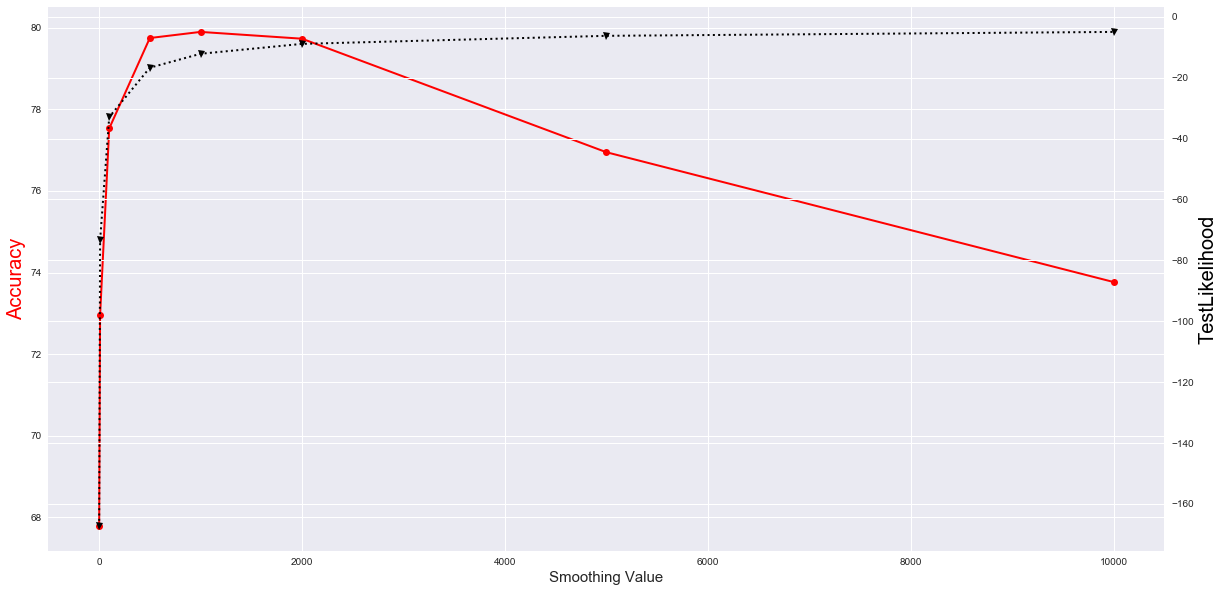

In [ ]:
figData = pd.DataFrame(metrits,columns=['Accuracy','Test-Likelihood'])
figData['x'] = smoothing
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.set_xlabel('Smoothing Value',fontsize=15)
ax.plot(figData['x'],figData['Accuracy'],'r-o',lw=2)
ax.set_ylabel('Accuracy',fontsize=20,color='red')
ax2 = ax.twinx()
ax2.plot(figData['x'],figData['Test-Likelihood'],'k:v',lw=2)
ax2.set_ylabel('TestLikelihood',fontsize=20,color='black')
plt.show()

#### COMMENT

<div class="alert alert-info" style="text-align:justify">The best value for c is around 1000. After obtain the best smoothing factor. We try with testing set to obtain final accuracy</div>

#### Runing with best hyper parameter 

In [29]:
model = NaiveBayesClassifier(training_mnist_data,training_mnist_labels,bRmUseless=False,smoothing=1000)
temp = model.testingOptimized(testing_mnist_data,testing_mnist_labels,'univariate',bTestLLH=True)

Mode: Batch - Accuracy = 81.490000% - Test likelihood = -10.464668 in 0.927277 seconds


### 2.3.Extra Test log-likelihood problem
--------------------------
If you notice, the test log-likelihood increases even the accuracy becomes worse. Normally, its form should be similar with accuracy line. In this step, I just want to show you some evidence that prove my computation work but the metrics is not useful in this situation.

In [41]:
smoothing = [1e-1,1,10,100,500,2000,5000,1e+4,2e+4,5e+4,8e+4,1e+5]
experimentData = MNIST_validate_data[2].flatten();
experimentLabel = MNIST_validate_labels[2];

# Predict for different smoothing
metrits = []
for i in smoothing:
    model = NaiveBayesClassifier(MNIST_train_data,MNIST_train_labels,bRmUseless=False,smoothing=i)
    metrits.append(model.predict(experimentData,'univariateSelf'))

print('Table of the change of likelihood over smoothing value')
# Calculate marginal
marginalValue = [EvaluationMetrics.approximateLogSum(np.array(metrits[i][1])) \
                         for i in range(len(smoothing))]

# filter likelihood of predict and correct class
llhBySmoothingTable = []
for i in range(len(smoothing)):
    metrit = metrits[i]
    llhBySmoothingTable.append(
        [metrit[0], metrit[1][metrit[0]], experimentLabel, metrit[1][experimentLabel]
         , marginalValue[i], metrit[1][experimentLabel] - marginalValue[i]])
    
pd.DataFrame(llhBySmoothingTable,index=smoothing,
             columns=['Predict Label','<~ log llh','Correct label','<~ log llh','log marginal'
                      ,'After different log marginal'])

Table of the change of likelihood over smoothing value


,Predict Label,<~ log llh,Correct label,<~ log llh,log marginal,After different log marginal
0.1,8,-2756.059297,5,-2834.392189,-2756.059297,-7.833289e+01
1.0,8,-3038.697994,5,-3077.939548,-3038.697994,-3.924155e+01
10.0,5,-3347.645805,5,-3347.645805,-3347.406008,-2.397965e-01
100.0,5,-3670.964470,5,-3670.964470,-3670.964470,0.000000e+00
500.0,5,-3937.665043,5,-3937.665043,-3937.665043,0.000000e+00
2000.0,5,-4193.155489,5,-4193.155489,-4193.155489,-1.338412e-08
5000.0,5,-4382.428396,5,-4382.428396,-4382.428378,-1.776787e-05
10000.0,5,-4546.242227,5,-4546.242227,-4546.241438,-7.893507e-04
20000.0,5,-4735.172675,5,-4735.172675,-4734.934151,-2.385241e-01
50000.0,1,-5021.560815,5,-5025.088827,-5021.513548,-3.575279e+00


#### COMMENT

<div class="alert alert-info" style="text-align:justify">I deliberately choose a sample that is corrected by using smoothing and become wrong when we increase greatly smoothing value. You can see that the log-likelihood (last columns) increase and reach the peak at smoothing as 500 then decrease gradually. When the predict went wrong, it goes down suddently and increase slightly after that. Everything seems normal but why does our result does not follow this trend. Take a look in next experiment. 
<br><br>
In next experiment, I try with 2 smoothing values that our result worse (20000 and 50000). Even the accuracy in smoothing as 20.000 is higher than 50.000 but Likelihood is smaller.</div>

In [ ]:
smoothing = [2e+4,5e+4]
metrits = []
for i in smoothing:
    print(''.join(['*']*100),'\nSmoothing={}'.format(i))
    model = NaiveBayesClassifier(MNIST_train_data,MNIST_train_labels,bRmUseless=False,smoothing=i)
    metrits.append(model.multiTest_Univariate(DataPreprocessing.flattenImage(MNIST_validate_data)))

# Calculate marginal
marginalValue = np.array([np.array(i[1])-EvaluationMetrics.approximateLogSum(np.array(i[1])) for i in metrits])

# find the log likelihood after normalization
llhcorrectlabel = []
for i in range(len(MNIST_validate_labels)):
    llhcorrectlabel.append(marginalValue[:,MNIST_validate_labels[i],i])
llhcorrectlabel = np.array(llhcorrectlabel)


In [8]:
print(''.join(['*']*100),'\nThe Smoothing increase from 20.000 to 50.000')
print(''.join(['*']*100))
idxx =  llhcorrectlabel[:,0]>llhcorrectlabel[:,1]
print('Number of samples that its test-likelihood decrease: ', len(llhcorrectlabel[idxx]))
print('sum of test-log likelihood on above sample with smoothing 20k and 50k corespondingly:'
                                    ,np.sum(llhcorrectlabel[idxx],axis=0))
idxx =  llhcorrectlabel[:,0]<llhcorrectlabel[:,1]
print('Number of samples that its test-likelihood increase: ', len(llhcorrectlabel[idxx]))
print('sum of test-log likelihood on above sample with smoothing 20k and 50k corespondingly:'
                                    ,np.sum(llhcorrectlabel[idxx],axis=0))


**************************************************************************************************** 
The Smoothing increase from 20.000 to 50.000
****************************************************************************************************
Number of samples that its test-likelihood decrease:  4377
sum of test-log likelihood on above sample with smoothing 20k and 50k corespondingly: [ -604.99004591 -1366.59101677]
Number of samples that its test-likelihood increase:  1554
sum of test-log likelihood on above sample with smoothing 20k and 50k corespondingly: [-22055.40096297 -11961.7775195 ]


#### COMMENT

<div class="alert alert-info" style="text-align:justify">
From this example, it shows that there are some sample still can be better in case increasing smoothing value. There are 4377 samples that log-likelihood go worse. However, the rate of change of log likelihood on those samples is much smaller than the ones that become better. That is the reason why the test-loglikelihood still increases while the accuracy become worse by time.</div>

## 2.4 *Bayesian Classifer and Dependence between features*
--------------------------
One of the important aspects in Naive Bayes is independence assumption between features. However, in practice, we cannot ignore this because more or less there is exist dependence between factors and Bayes classifer take count it. (The implimentation in "bayesClassifer.py")

In [11]:
model = BayesClassifier(training_mnist_data,training_mnist_labels,smoothing=3000)

In [5]:
print(''.join(['*']*100),'\nAccuracy - Speed Performance Testing on the whole training set')
print(''.join(['*']*100))
temp = model.testing(testing_mnist_data,testing_mnist_labels)
temp = model.testingOptimized(testing_mnist_data,testing_mnist_labels)

**************************************************************************************************** 
Accuracy - Speed Performance Testing on the whole training set
****************************************************************************************************
Mode: Single - Accuracy = 95.680000% in 297.761679 seconds
Mode: Batch - Accuracy = 95.680000% in 2.196946 seconds


#### COMMENT
The test shows the different between loops over testing set and working on matrix. 

In [14]:
[MNIST_train_data,MNIST_train_labels,MNIST_validate_data,MNIST_validate_labels] = \
                DataPreprocessing.train_validate_split(np.array(training_mnist_data),np.array(training_mnist_labels),0.9,0.1)

In [51]:
smoothing = [1,100,500,1000,3000,4000,5000,10000]
metrits = []
for i in smoothing:
    print(''.join(['*']*100),'\nSmoothing={}'.format(i))
    model = BayesClassifier(MNIST_train_data,MNIST_train_labels,smoothing=i)
    metrits.append(model.testingOptimized(MNIST_validate_data,MNIST_validate_labels,bTestLLH=True))


**************************************************************************************************** 
Smoothing=1
Mode: Batch - Accuracy = 83.833333% - Test likelihood = -193.656500 in 1.275402 seconds
**************************************************************************************************** 
Smoothing=100
Mode: Batch - Accuracy = 91.250000% - Test likelihood = -10.130167 in 1.412281 seconds
**************************************************************************************************** 
Smoothing=500
Mode: Batch - Accuracy = 93.600000% - Test likelihood = -3.089000 in 1.477526 seconds
**************************************************************************************************** 
Smoothing=1000
Mode: Batch - Accuracy = 94.533333% - Test likelihood = -1.852333 in 1.299632 seconds
**************************************************************************************************** 
Smoothing=3000
Mode: Batch - Accuracy = 94.733333% - Test likelihood = -0.877000 in 1.40

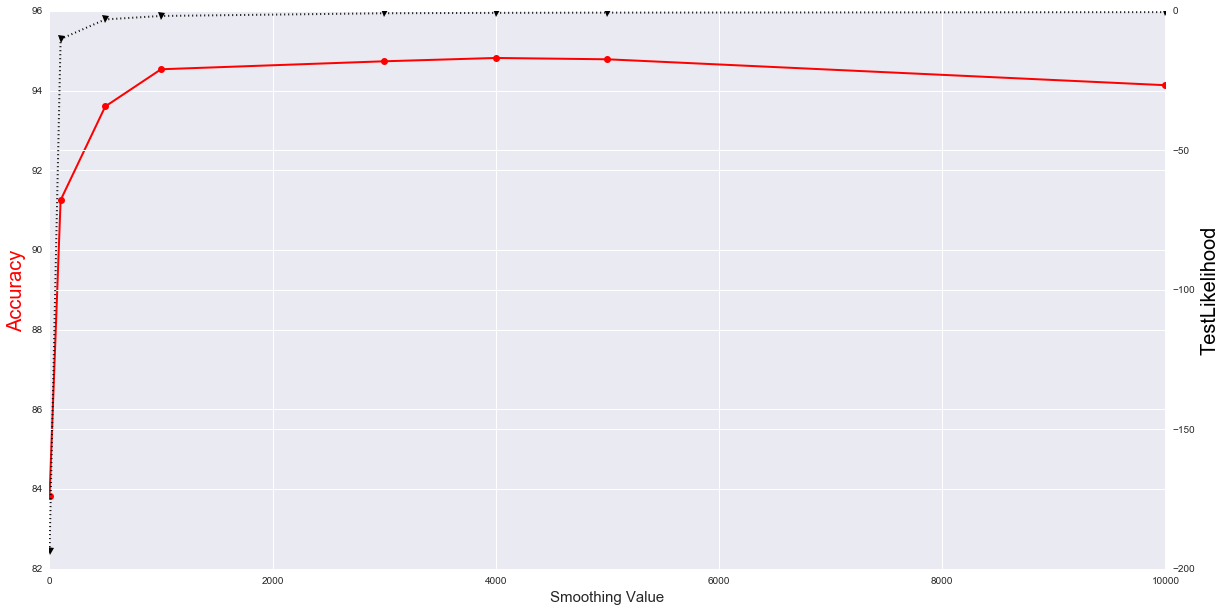

In [52]:
figData = pd.DataFrame(metrits,columns=['Accuracy','Test-Likelihood'])
figData['x'] = smoothing
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.set_xlabel('Smoothing Value',fontsize=15)
ax.plot(figData['x'],figData['Accuracy'],'r-o',lw=2)
ax.set_ylabel('Accuracy',fontsize=20,color='red')
ax2 = ax.twinx()
ax2.plot(figData['x'],figData['Test-Likelihood'],'k:v',lw=2)
ax2.set_ylabel('TestLikelihood',fontsize=20,color='black')
plt.show()

#### Runing with best hyper parameter 

Mode: Batch - Accuracy = 95.680000% - Test likelihood = -0.817668 in 2.693150 seconds


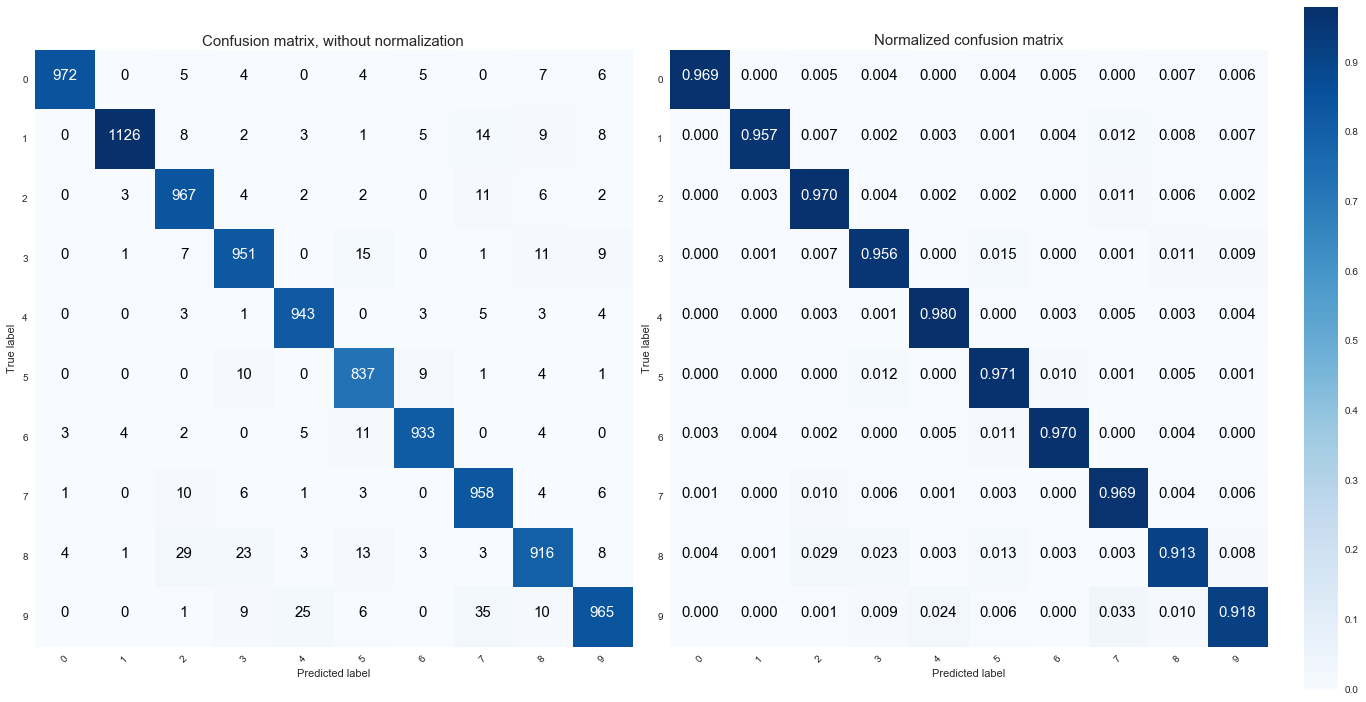

In [53]:
model = BayesClassifier(training_mnist_data,training_mnist_labels,smoothing=3000)
preLabel = model.testingOptimized(testing_mnist_data,testing_mnist_labels,bTestLLH=True,bLabel=True)
# Compute confusion matrix
EvaluationMetrics.plotConfusionMatrixModel(preLabel,np.array(testing_mnist_labels))

## 2.5 *Naive Bayes and Bayes classifer on CIFAR set*
-------

In [9]:
model = NaiveBayesClassifier(training_cifar_images,training_cls,bRmUseless=False,smoothing=100)

In [104]:
countZeroStd = []
for i in range(10):
    countZeroStd.append(np.sum(model.componentPrior[i][1]==0))
pd.DataFrame([np.arange(10),countZeroStd],index=['classID','Number of zero var'])

,0,1,2,3,4,5,6,7,8,9
classID,0,1,2,3,4,5,6,7,8,9
Number of zero var,0,0,0,0,0,0,0,0,0,0


#### COMMENT

<div class="alert alert-info" style="text-align:justify">In CIFAR 10, we don't have the problem about variance equal to zero. It is a good new.</div>

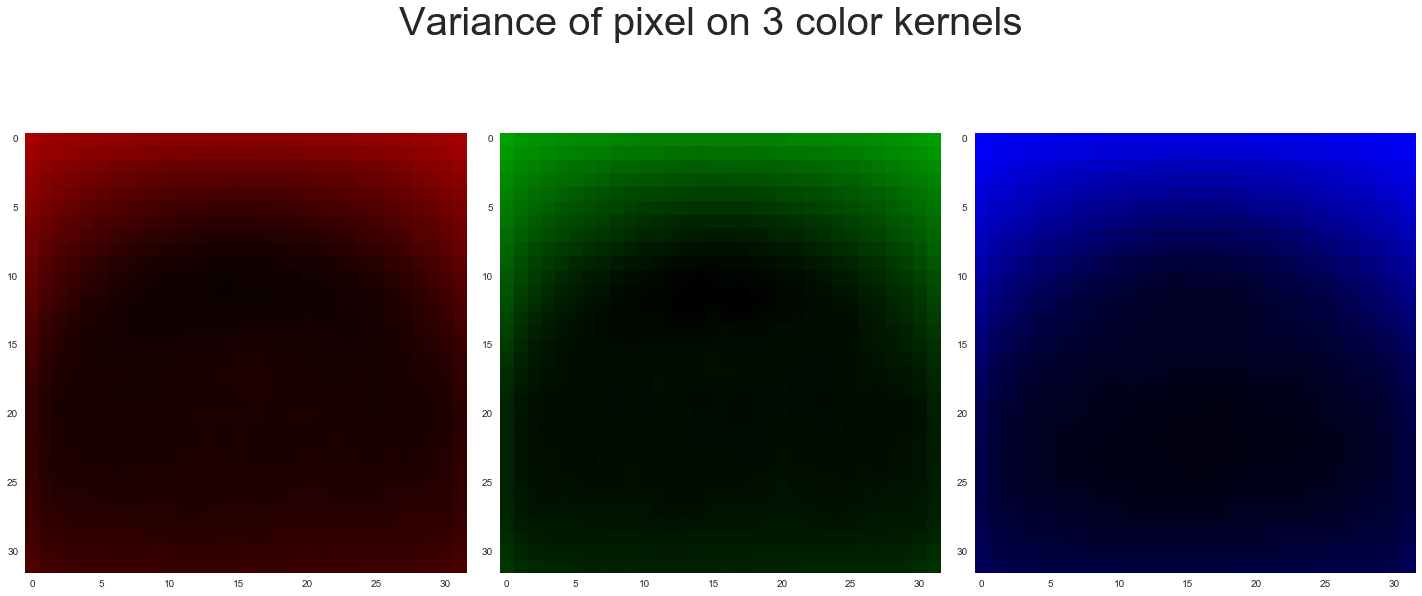

In [15]:
def plotImage(ax,idx,img):
    size = len(img)
    temp = np.zeros([size,size,3])
    temp[:,:,idx] = img
    imgplot = ax.imshow(temp)
    imgplot.set_interpolation('nearest')
    plt.grid(False)

fig = plt.figure(figsize=(20,10))
varr = np.var(training_cifar_images,axis=0)
varr = (varr-np.min(varr))/(np.max(varr)-np.min(varr))
ax = plt.subplot(1,3,1)
plotImage(ax,0,varr[:,:,0])
ax = plt.subplot(1,3,2)
plotImage(ax,1,varr[:,:,1])
ax = plt.subplot(1,3,3)
plotImage(ax,2,varr[:,:,2])
fig.suptitle('Variance of pixel on 3 color kernels',fontsize=40)
fig.set_tight_layout(True)

#### COMMENT

<div class="alert alert-info" style="text-align:justify"> Picture show you, variance of the pixel on 3 color kernels. The most common thing is top one third of the picture usually have high variance than other on both 3 color kernels.</div>

#### **Naive Bayes Classifer**

In [16]:
model = NaiveBayesClassifier(training_cifar_images,training_cls,bRmUseless=False,smoothing=0)
x = model.testingOptimized(testing_cifar_images,testing_cls,'univariate')

Mode: Batch - Accuracy = 29.760000% in 6.149808 seconds


#### **Bayes Classifier**

In [171]:
model = BayesClassifier(training_cifar_images,training_cls,bRmUseless=False,smoothing=0)
x = model.testingOptimized(testing_cifar_images,testing_cls,'univariate')

Mode: batch - Accuracy = 36.230000% - Test likelihood = nan in 31.672458 seconds


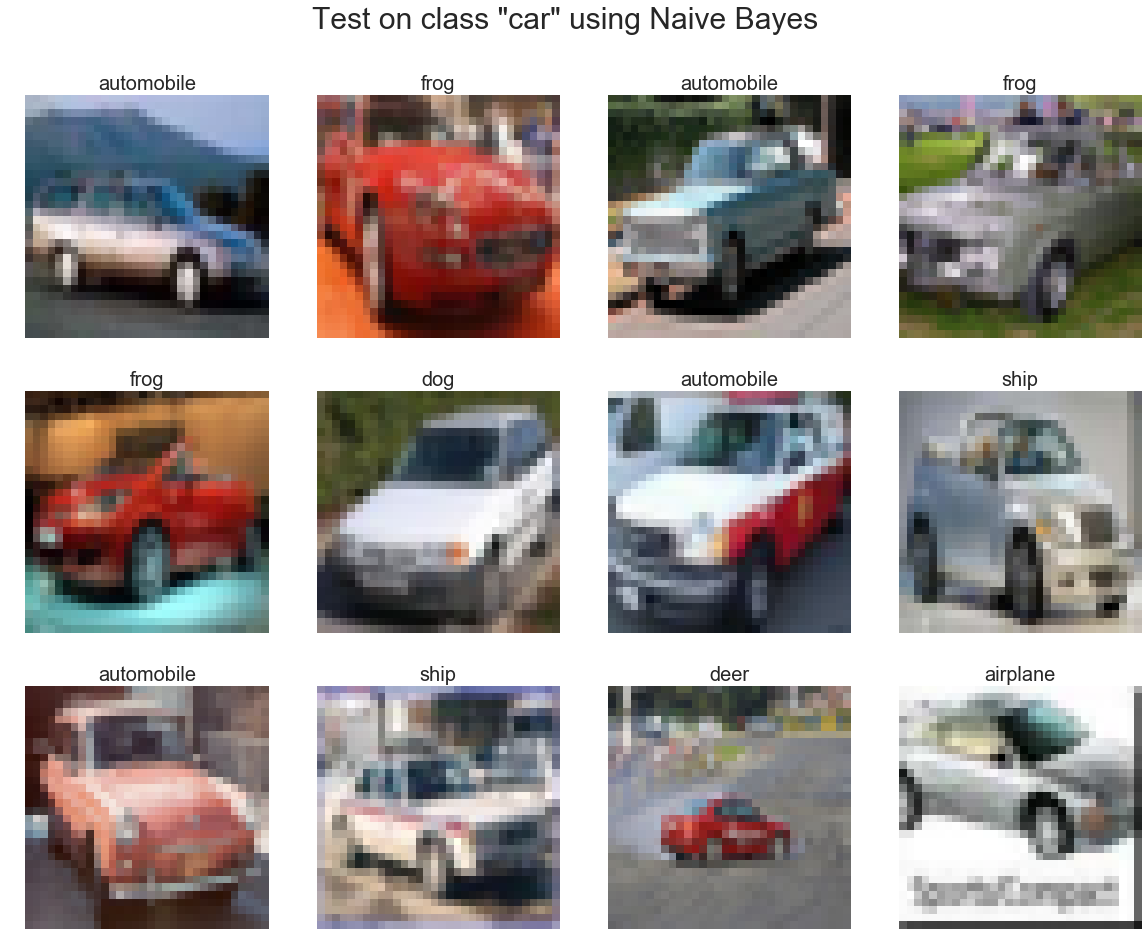

In [341]:
n_pic = 12
cars = training_cifar_images[training_cls==1][:n_pic]
labels = [model.predict(x)[0] for x in DataPreprocessing.flattenImage(cars)]
def plotImage(ax,img,label):
    imgplot = ax.imshow(img)
    imgplot.set_interpolation('nearest')
    ax.set_title(label,fontsize=20)
    ax.set_axis_off()
    ax.grid(False)
fig, ax = plt.subplots(3,4)
fig.set_figheight(15)
fig.suptitle('Test on class "car" using Naive Bayes',fontsize=30)
fig.set_figwidth(20)
for i in range(n_pic):
    plotImage(ax[int(i/4)][i%4],cars[i],cifar_class_name[labels[i]])
plt.show()

#### Comment

<div class="alert alert-info" style="text-align:justify">
The result seems really bad. (29.8% for NB Classifer and 36.23 for Bayes Classifer). From the some sample from testing, it is easy to understand why it is worse than MNIST set. Unlike MNIST, CIFAR objects vary in shape, color and even the position. Some of picture also lose a part of object body and some of them has small object compared with background. In this case I do not use **smoothing** trick as before because variance of pixel in this case is small ($variance <1$) and all of them is over 0. Instead, I use other method like **Princple Component Analysis**, **Global Descriptor** like HOG or **Dense SIFT**</div>

## 2.6 *Princple Component Analysis - Dimension Reduction*
-------
PCA can be seen as a change of coordinates to a coordinate system where the coordinates are in descending order of importance. In addition, PCA uses the variance of each feature to maximize its separability. That means that if we only choose high discriminative dimension (high variances) and remove low variance dimension ( for me that can be called noise) we will obtain better result

In [71]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
normalized_train_data = DataPreprocessing.flattenImage(training_cifar_images)
normalized_test_data = DataPreprocessing.flattenImage(testing_cifar_images)

#### COMMENT

<div class="alert alert-info" style="text-align:justify">
The idea comes from ML course in Coursera (https://www.coursera.org/learn/machine-learning/lecture/S1bq1/choosing-the-number-of-principal-components). Retaining components that cumulatively explain a certain percentage of variation. The acceptable level of explained variance in this case we choose least 90% of the variance explained.</div>

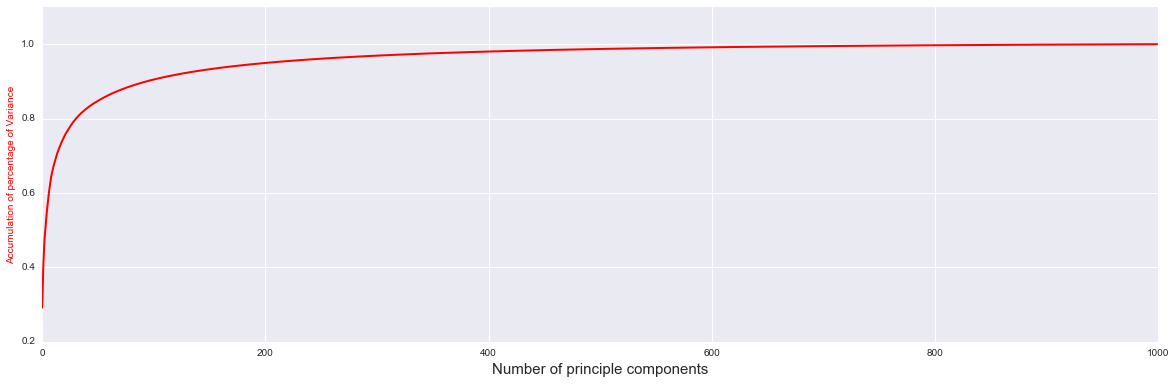

In [389]:
plt.figure(figsize=(20,6))
figData = np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_))
ax = plt.subplot(111)
ax.set_xlabel('Number of principle components',fontsize=15)
ax.plot(np.arange(len(figData)),figData,'r-',lw=2)
ax.set_ylabel('Accumulation of percentage of Variance',fontsize=10,color='red')
plt.show()

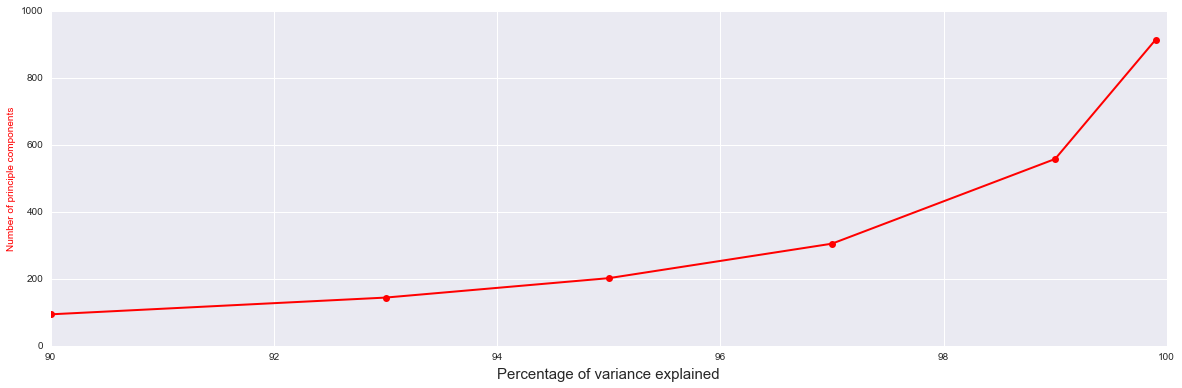

In [400]:
level = np.array([90,93,95,97,99,99.9])/100
plt.figure(figsize=(20,6))
levelData = [np.sum(figData<x) for x in level]
ax = plt.subplot(111)
ax.set_xlabel('Percentage of variance explained',fontsize=15)
ax.plot(level*100,levelData,'r-o',lw=2)
ax.set_ylabel('Number of principle components',fontsize=10,color='red')
plt.show()

#### COMMENT

<div class="alert alert-info" style="text-align:justify">
Increasing percentage of variace explained, numbers of components increase quickly at the point 95%. So in this case we should choose number component around 200. However, to check whether the best number of principle components. We will do experiments below</div> 

In [74]:
nComponent = [10,30,50,100,200,350,500,800,1000,2000]
accNB = []
accBC = [] 
for i in nComponent:
    print(''.join(['*']*100),'\nNumber of principle components = %d'%(i))
    pca = decomposition.PCA(n_components=i)
    pca.fit(normalized_train_data)
    pca_train_data = pca.transform(normalized_train_data)
    pca_test_data = pca.transform(normalized_test_data)
    print('Naive Bayes - ',end='')
    model = NaiveBayesClassifier(pca_train_data,training_cls,bRmUseless=False,smoothing=0)
    accNB.append(model.testingOptimized(pca_test_data,testing_cls,'univariate')[0])
    print('Bayes Classifer - ',end='')
    model = BayesClassifier(pca_train_data,training_cls,bRmUseless=False,smoothing=0)
    accBC.append(model.testingOptimized(pca_test_data,testing_cls,'univariate')[0])

**************************************************************************************************** 
Number of principle components = 10
Naive Bayes - Mode: Batch - Accuracy = 33.210000% in 0.013882 seconds
Bayes Classifer - Mode: Batch - Accuracy = 36.750000% - Test likelihood = -1.832731 in 0.131943 seconds
**************************************************************************************************** 
Number of principle components = 30
Naive Bayes - Mode: Batch - Accuracy = 36.850000% in 0.016388 seconds
Bayes Classifer - Mode: Batch - Accuracy = 46.430000% - Test likelihood = -2.001320 in 0.045668 seconds
**************************************************************************************************** 
Number of principle components = 50
Naive Bayes - Mode: Batch - Accuracy = 34.810000% in 0.039919 seconds
Bayes Classifer - Mode: Batch - Accuracy = 46.860000% - Test likelihood = -2.546565 in 0.080188 seconds
****************************************************************

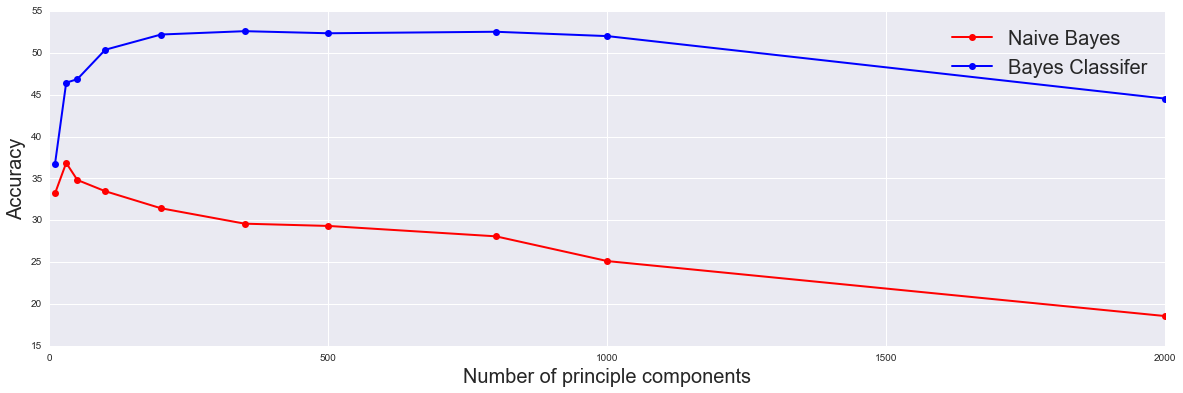

In [75]:
plt.figure(figsize=(20,6))
ax = plt.subplot(111)
ax.set_ylabel('Accuracy',fontsize=20)
ax.plot(nComponent,accNB,'r-o',lw=2,label='Naive Bayes')
ax.plot(nComponent,accBC,'b-o',lw=2,label='Bayes Classifer')
ax.set_xlabel('Number of principle components',fontsize=20)
plt.legend(loc=1,fontsize=20)
plt.show()

#### COMMENT

<div class="alert alert-info" style="text-align:justify">
As you can see, the curves have their pick, 30 PCs for Naive Bayes and 350 PCs for Bayes. And why the result increase and then decrease. With few PCs, we still not obtain enough information for classifer (30 PCs only cover 70% of variance explained) and with high PCs, we accidentally add more noise data (useless information) into our model. In addition, the best number of PCs in both case are different because of NB and Bayes assumption. While Bayes Classifer take count the dependence of variables so that the additional PCs may helpful for classification, Naive Bayes assume all of them are independent so low-eigenvalue PCs may not helful for them to classify our problem. </div>

## 2.7 *Histogram of Oriented Gradients - Global Descriptor*
-------
HoG is an global descriptor that means we want to extract useful information from the whole image. HOG captures shape of structures in the region by capturing information about gradients which is good for our dataset that is daily object. 

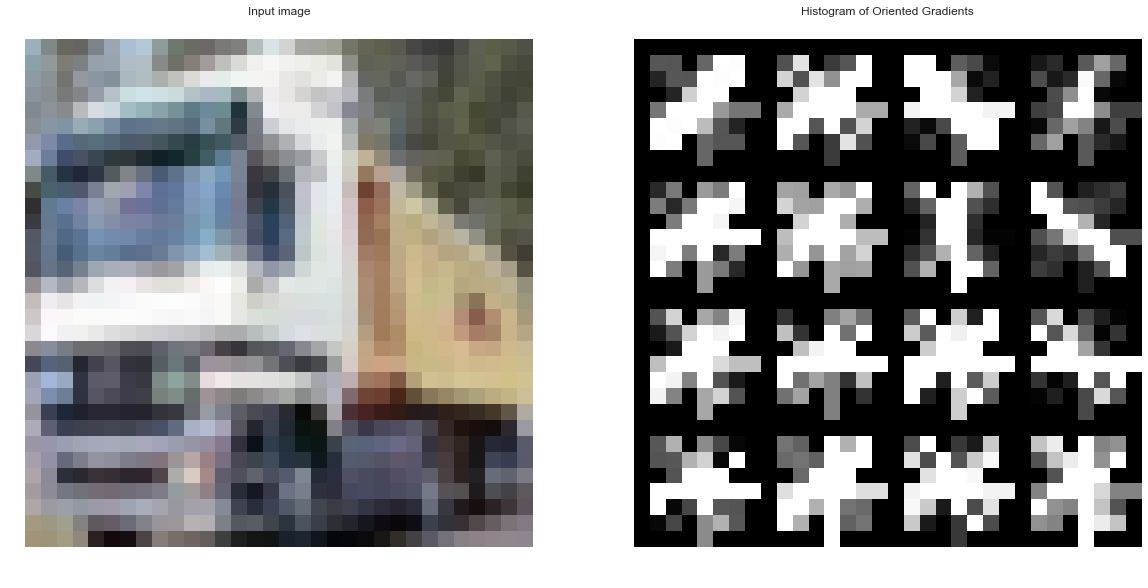

In [13]:
image = color.rgb2gray(training_cifar_images[1])

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(training_cifar_images[1])
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better displayf
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()


#### COMMENT

<div class="alert alert-info" style="text-align:justify"> The right picture shwos you HoG features by location. It is easy to notice that the shape of the car (like square box) retain in feature picture. In HoG, we 3 hyper parameter that we should search: Orientation, Pixel for cells and cell per blocks. </div>

In [34]:
print(''.join(['*']*100),'\nFind optimal HOG parameter')
orientation = [4,8,16]
pPercell = [4,6,8]
cPerBlock = [1,2]
for o in orientation:
    for p in pPercell:
        for c in cPerBlock: 
            print(''.join(['*']*100))
            print('Orientation = {:d}, Pixels/Cell= {:d}, Cells/Block= {:d}'.format(o,p,c))
            train = DataPreprocessing.HOG(color.rgb2yuv,training_cifar_images,orientation=o,pPerCell=p,cPerBlock=c)
            test = DataPreprocessing.HOG(color.rgb2yuv,testing_cifar_images,orientation=o,pPerCell=p,cPerBlock=c)
            model = NaiveBayesClassifier(train,training_cls,bRmUseless=False,smoothing=0)
            model.testingOptimized(test,testing_cls,'univariate')
            model = BayesClassifier(train,training_cls,bRmUseless=False,smoothing=0)
            model.testingOptimized(test,testing_cls)

**************************************************************************************************** 
Find optimal HOG parameter
****************************************************************************************************
Orientation = 4, Pixels/Cell= 4, Cells/Block= 1
Mode: Batch - Accuracy = 40.190000% in 1.188498 seconds
Mode: Batch - Accuracy = 22.450000% in 2.915025 seconds
****************************************************************************************************
Orientation = 4, Pixels/Cell= 4, Cells/Block= 2
Mode: Batch - Accuracy = 40.190000% in 1.073294 seconds
Mode: Batch - Accuracy = 22.450000% in 2.560987 seconds
****************************************************************************************************
Orientation = 4, Pixels/Cell= 6, Cells/Block= 1
Mode: Batch - Accuracy = 38.570000% in 0.332312 seconds
Mode: Batch - Accuracy = 21.530000% in 0.678587 seconds
****************************************************************************************

#### COMMENT
<div class="alert alert-info" style="text-align:justify">The best parameter we found is [orientation=16, PixelPerCell=4, CellPerBlock=2]. Next, we try with new feature with and without PCA.</div>

In [32]:
train = DataPreprocessing.HOG(color.rgb2yuv,training_cifar_images,orientation=16,pPerCell=4,cPerBlock=2)
test = DataPreprocessing.HOG(color.rgb2yuv,testing_cifar_images,orientation=16,pPerCell=4,cPerBlock=2)
print(''.join(['*']*100),'\nBest HOG parameter without PCA')
print(''.join(['*']*100))
model = NaiveBayesClassifier(train,training_cls,bRmUseless=False,smoothing=0)
temp = model.testingOptimized(test,testing_cls,'univariate')
model = BayesClassifier(train,training_cls,bRmUseless=False,smoothing=0)
temp = model.testingOptimized(test,testing_cls)

**************************************************************************************************** 
Best HOG parameter without PCA
****************************************************************************************************
Mode: Batch - Accuracy = 45.880000% in 5.391999 seconds
Mode: Batch - Accuracy = 36.980000% in 29.387711 seconds


In [33]:
normalized_train_data = train
normalized_test_data = test
pca = decomposition.PCA(n_components=100)
pca.fit(normalized_train_data)
pca_train_data = pca.transform(normalized_train_data)
pca_test_data = pca.transform(normalized_test_data)
print(''.join(['*']*100),'\nBest HOG parameter with PCA')
print(''.join(['*']*100))
print('Naive Bayes - ',end='')
model = NaiveBayesClassifier(pca_train_data,training_cls,bRmUseless=False,smoothing=0)
temp = model.testingOptimized(pca_test_data,testing_cls,'univariate')
print('Bayes Classifer - ',end='')
model = BayesClassifier(pca_train_data,training_cls,bRmUseless=False,smoothing=0)
temp = model.testingOptimized(pca_test_data,testing_cls)

**************************************************************************************************** 
Best HOG parameter with PCA
****************************************************************************************************
Naive Bayes - Mode: Batch - Accuracy = 41.400000% in 0.080547 seconds
Bayes Classifer - Mode: Batch - Accuracy = 54.140000% in 0.080964 seconds


#### COMMENT
<div class="alert alert-info" style="text-align:justify"> 
As you notice, the result in Naive Bayes increases greatly from 29.7% to 45.8% while the outcome of Bayes classifer does not change. After we apply PCA for HoG features, the accuracy of Naive Bayes decrease slightly while Bayes classifer is boosted by PCA (54.14% in accuracy). The reason is HoG features contains the noise feature, under strong assumption about independent variable Naive Bayes suffer less and perform better while Bayes is sensitive toward small, irrelevant feature. That is also why when we use PCA which helps us remove noisy when we remove dimension in transformed coordinate.
</div>

<div class="alert alert-success" style="text-align:justify">
  <strong>CONCLUSION</strong><br><br>
  Naive Bayes is simple to understand and easy to implement but still powerful in some case. In addition, it runs quite fast. However, the strong assumption that 2 variables are independent make this classifer is far away with practical situation. However, I also show you another version (Bayes classifer) which performs much better than "naive" one. Furthermore, using Gaussian distribution implimentation helps us deal with continuous data that Bernoulli and Multinomial version cannot work on. One of another drawback that we saw on MNIST data is huge difference in probability between 2 pixel value that make our likelihood become dominant or so weak. However, I also introduce smoothing parameter that can heal and lighten this problem. Last but not least, the Bayes Classifer work well with "general" problem, the "general" in this case means the charasteristic of the target does not change too much. As you can see that, mean of all number image still retain the shape and form of the number while the object change the shape, point of view, color,... in CIFAR classifer. Finally, I believe that, Bayes Classifier which takes count the relation between feature can work better than random classifer which accuracy equal to 1/nClass.
</div>

<br>
<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0">III. Classification - Bayes Linear Regression classifier</h1></div>


## *3.1 Bayesian Linear Regression Implementation*
-------
As I learn in class, we have 3 methods to model Linear regression: Loss minimization, Maximum Likelihood estimation and **bayessian linear classification**. We also know loss minization is just a consequence of MLE. In MLE, we try to maximize likelihood of data given that parameter, $ Likelihood = p(t|X, w, σ^2) = \prod_{n=1}^N  p(t_n|x_nw, σ^2)$. So it does not address to the over-fitting problem. So **bayessian linear classification**, called maximum a-posterior, we take into acount $p(t|w, X, σ^2)p(w)$, under point of view that our prediction is expectation in space of the possible models. This idea help to avoid the overfitting problem. 


In [5]:
from linearRegression import *

## *3.2 Treat your data label as continuous*
-------
Linear regression require continuous data. However, our labels are discritized. We can represent the class as a number and use them as continuous data. To convert our prediction back to the class label, I use the simplest discretization method, **Equal Interval Width**, merely divides the range of observed values for a variable into k equal sized bins.  In this case, we have 10 ranges. For example, if y value is from 1.5 to 2.5, it belongs to class 2. 

Refer from this paper (http://ai.stanford.edu/~ronnyk/disc.pdf), I know that there are many options to discritize the continuous data. Because of the worse result, I do not go detail for those methods. 

##### MNIST

In [8]:
# Training step
X = DataPreprocessing.flattenImage(training_mnist_data)
model = LinearClassifier(X,training_mnist_labels,bMulticlass=False,weightVar=1e-5,noiseVar=1)

# Testing step
Xnew = DataPreprocessing.flattenImage(testing_mnist_data)
Ypredict = model.predict(Xnew)

# Accuracy
print(''.join(['*']*100),'\nSingle Classifier - MINIST')
print(''.join(['*']*100))
print('Accuracy =',
      EvaluationMetrics.accuracy(EvaluationMetrics.roundByClass(np.around(Ypredict[0][0]),model.LabelIDs),testing_mnist_labels))
print('MSE =',EvaluationMetrics.MSE(Ypredict[0][0],testing_mnist_labels))

**************************************************************************************************** 
Single Classifier - MINIST
****************************************************************************************************
Accuracy = 0.2549
MSE = 3.53505059334


,ClassID,Quatity on prediction
0,0,45
1,1,119
2,2,109
3,3,132
4,4,140
5,5,131
6,6,118
7,7,96
8,8,48
9,9,62


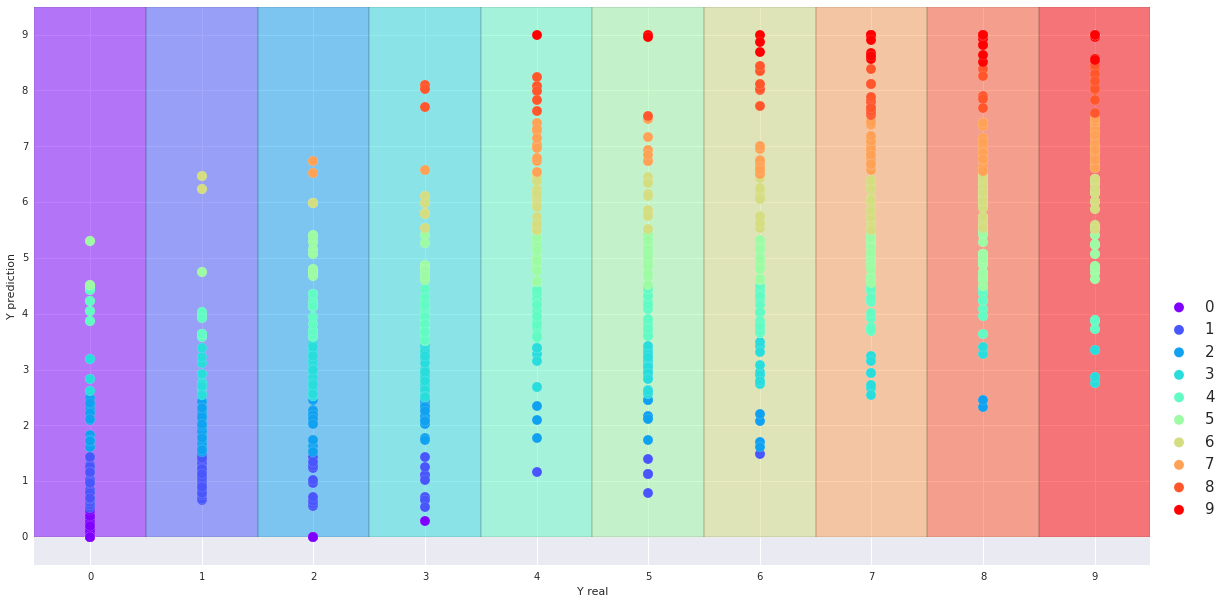

In [9]:
EvaluationMetrics.scatterPlotRegression(testing_mnist_labels,Ypredict[0][0],1000)

#### COMMENT
<div class="alert alert-info" style="text-align:justify"> The accuracy we obtained for MNIST is quite bad (25% compared with 96.4% we obtained by using Bayes Classifier). In addition, if you take a look from the table, the prediction trends to give the result in the middle region (from 3 to 6) than 2 head and tail. 

The graph above shows you the disrtribution of prediction on each class. Interestingly, the prediction rails on each class have a trend to move up with increasing value of Y real.</div>

##### CIFAR

In [13]:
# Training step
X = DataPreprocessing.flattenImage(training_cifar_images)

Y = training_cls
model = LinearClassifier(X,Y,bMulticlass=False,weightVar=1e-1,noiseVar=1)

# Testing step
Xnew = DataPreprocessing.flattenImage(testing_cifar_images)
Y = testing_cls
Ypredict = model.predict(Xnew)

# Accuracy
print(''.join(['*']*100),'\nSingle Classifier - MINIST')
print(''.join(['*']*100))
print('Accuracy =',
      EvaluationMetrics.accuracy(EvaluationMetrics.roundByClass(np.around(Ypredict[0][0]),model.LabelIDs),Y))
print('MSE =',EvaluationMetrics.MSE(Ypredict[0][0],Y))

**************************************************************************************************** 
Single Classifier - MINIST
****************************************************************************************************
Accuracy = 0.1122
MSE = 7.72387367526


,ClassID,Quatity on prediction
0,2,16
1,3,143
2,4,390
3,5,307
4,6,110
5,7,25
6,8,3
7,9,6


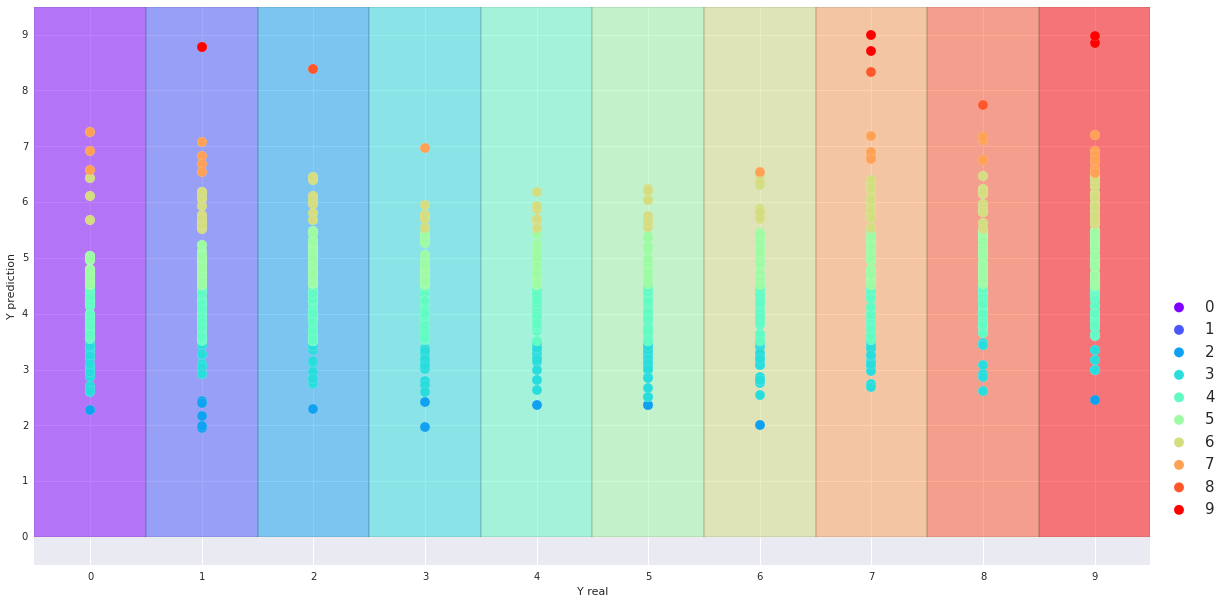

In [15]:
EvaluationMetrics.scatterPlotRegression(Y,Ypredict[0][0],1000)

#### COMMENT
<div class="alert alert-info" style="text-align:justify">With cifar, the result is much more terrible. 11.2% in accuracy is close to the accuracy of random classifer. In addition, predict values are just around 4 and 5. This experiment again shows that linear regression is not a good option for classification problem.</div>

## *3.3 Improve by using non-linear data*
-------
As we tried in lab session, we can transform data so that we can create non-linear model. In this session, I will try with higher polynominal term and evaluate the result.

In [5]:
print(''.join(['*']*100),'\nLinear Regression - MINIST')
print(''.join(['*']*100))

evalList = []
for i in range(1,7):
    X = DataPreprocessing.flattenImage(training_mnist_data)
    X = DataPreprocessing.generateNonLinearData(X,i)
    Xnew = DataPreprocessing.flattenImage(testing_mnist_data)
    Xnew = DataPreprocessing.generateNonLinearData(Xnew,i)

    # Train - test
    model = LinearClassifier(X,training_mnist_labels,bMulticlass=False,weightVar=1e-5,noiseVar=1)
    Ypredict = model.predict(Xnew)

    # Accuracy
    mAcc = EvaluationMetrics.accuracy(EvaluationMetrics.roundByClass(np.around(Ypredict[0][0]),model.LabelIDs),testing_mnist_labels)
    mMSE = EvaluationMetrics.MSE(Ypredict[0][0],testing_mnist_labels)
    evalList.append([mAcc, mMSE])
    print('Order: %d'%(i),'\t Accuracy =', mAcc, '\t MSE =', mMSE)
    

**************************************************************************************************** 
Linear Regression - MINIST
****************************************************************************************************
Order: 1 	 Accuracy = 0.2549 	 MSE = 3.53505059334
Order: 2 	 Accuracy = 0.2641 	 MSE = 2.75061779053
Order: 3 	 Accuracy = 0.2603 	 MSE = 2.76225599851
Order: 4 	 Accuracy = 0.2645 	 MSE = 2.76745490708
Order: 5 	 Accuracy = 0.2672 	 MSE = 2.78992885472
Order: 6 	 Accuracy = 0.2645 	 MSE = 2.81277385424


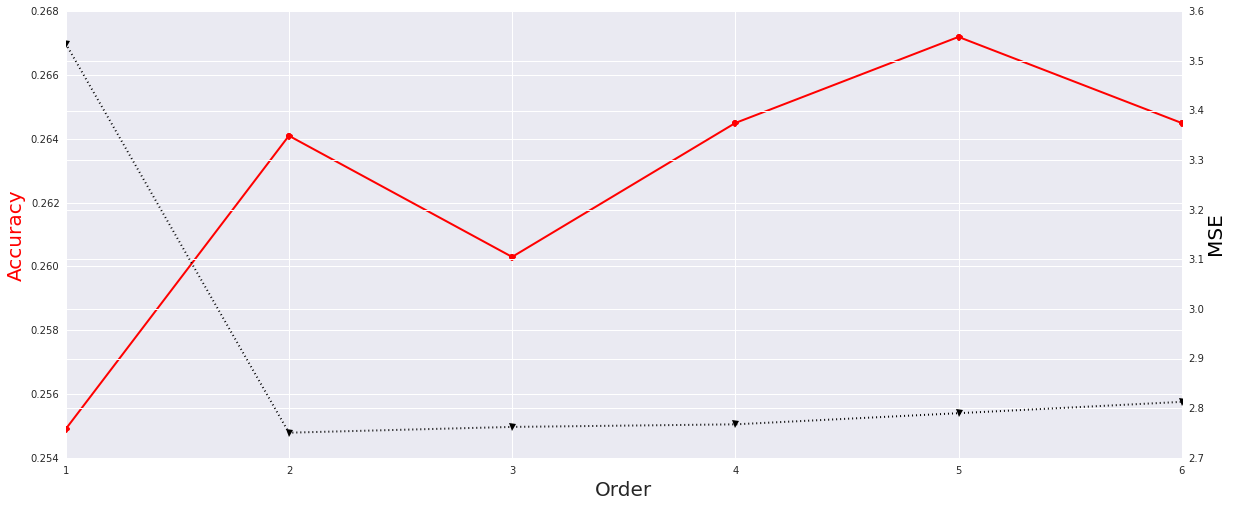

In [11]:
figData = pd.DataFrame(evalList,columns=['Accuracy','MSE'])
figData['x'] = np.arange(1,7)
plt.figure(figsize=(20,8))
ax = plt.subplot(111)
ax.set_xlabel('Order',fontsize=20)
ax.plot(figData['x'],figData['Accuracy'],'r-o',lw=2)
ax.set_ylabel('Accuracy',fontsize=20,color='red')
ax2 = ax.twinx()
ax2.plot(figData['x'],figData['MSE'],'k:v',lw=2)
ax2.set_ylabel('MSE',fontsize=20,color='black')
plt.show()

#### COMMENT
<div class="alert alert-info" style="text-align:justify">
From the graph, the best order for our problem is 2 which we obtains higher accuracy and lower mean square error. However, the result does not improve too much, nearly 1%, which is still far away what we obtains in Bayes Classifer. </div>

## *3.4 Multiclassifier*
-------
The reason that makes our result worse is the way we treat labels as continuous. If the y label is close to 1, we cannot say it is similar with number 0 or number 2. In fact, number 1 can look similar with number 7. That means we lost the relation aspect in the way we treat label as continuous data. 

Multiclassifier idea can fix this problem as following: we create the linear classfier for each class with y value from 0 to 1, which shows how similarity between the input number and that class. Finally, we will choose the class that have the most similarity to our input.

##### MNIST

**************************************************************************************************** 
Muti-Classifier - MINIST
****************************************************************************************************
Accuracy = 0.879


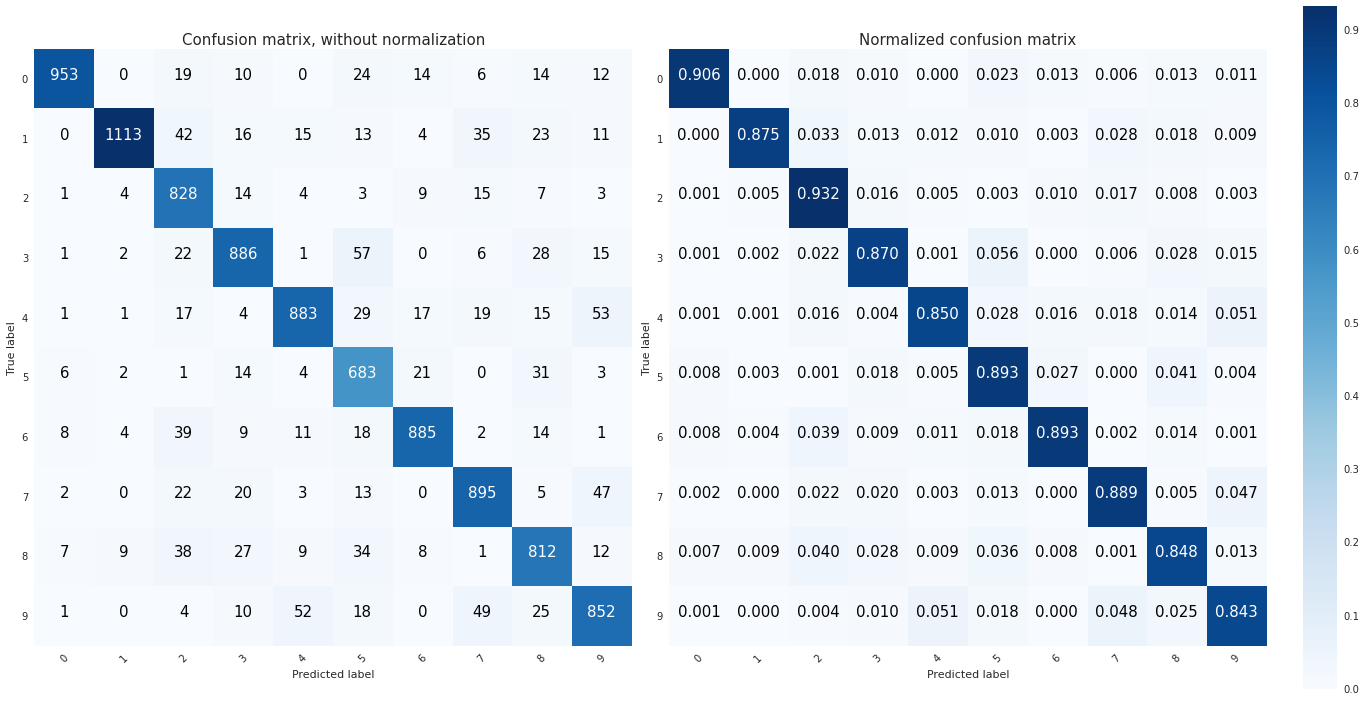

In [16]:
X = DataPreprocessing.flattenImage(training_mnist_data)
X = DataPreprocessing.generateNonLinearData(X,2)
model = LinearClassifier(X,training_mnist_labels,bMulticlass=True,weightVar=1,noiseVar=1)
Xnew = DataPreprocessing.flattenImage(testing_mnist_data)
Xnew = DataPreprocessing.generateNonLinearData(Xnew,2)
Ypredict = model.predictMulti(Xnew)
YpredictLabel = np.argmax(Ypredict,axis=0)
print(''.join(['*']*100),'\nMuti-Classifier - MINIST')
print(''.join(['*']*100))
print('Accuracy =',
      EvaluationMetrics.accuracy(YpredictLabel,testing_mnist_labels))
EvaluationMetrics.plotConfusionMatrixModel(y_predict=YpredictLabel,y_true=testing_mnist_labels)

##### CIFAR

**************************************************************************************************** 
Muti-Classifier - Cifar
****************************************************************************************************
Accuracy = 0.3781


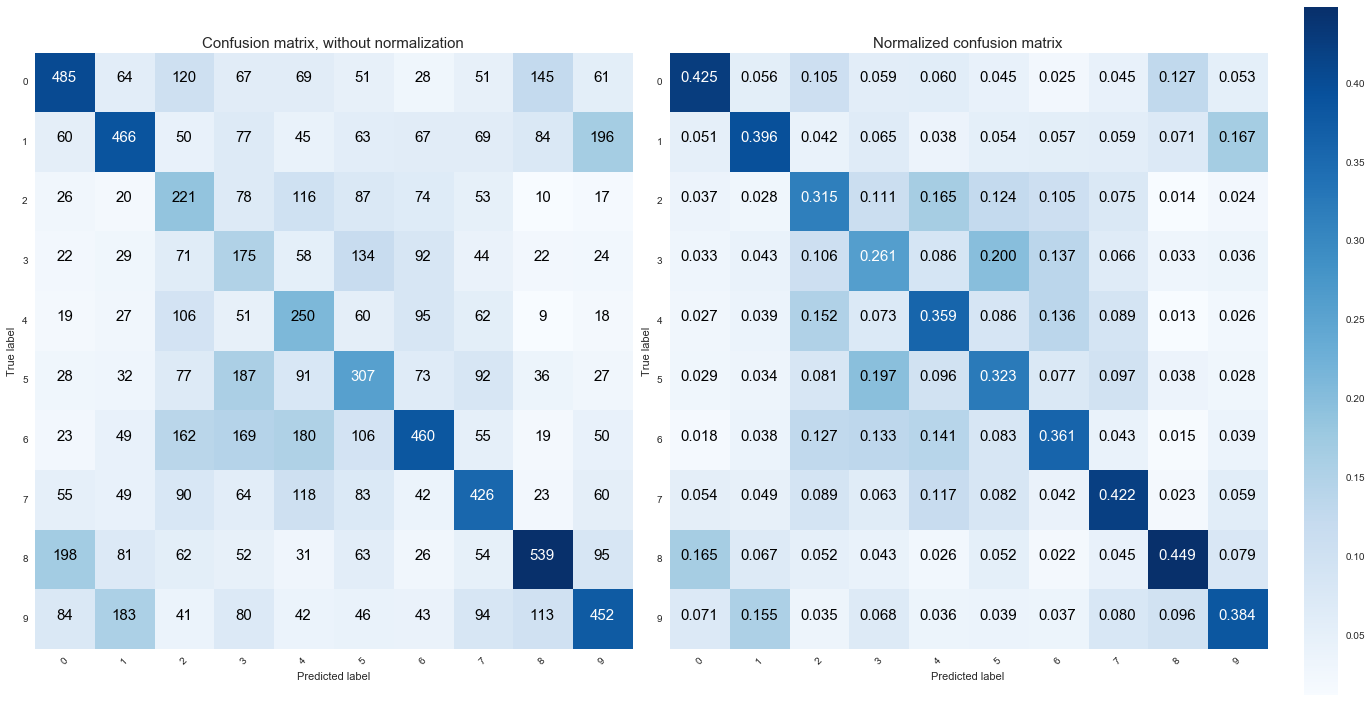

In [21]:
# train
X = DataPreprocessing.flattenImage(training_cifar_images)
Y = training_cls
model = LinearClassifier(X,Y,bMulticlass=True,weightVar=1,noiseVar=1)
# test
Xnew = DataPreprocessing.flattenImage(testing_cifar_images)
Ynew = testing_cls
Ypredict = model.predictMulti(Xnew)
YpredictLabel = np.argmax(Ypredict,axis=0)
print(''.join(['*']*100),'\nMuti-Classifier - Cifar')
print(''.join(['*']*100))
print('Accuracy =',
      EvaluationMetrics.accuracy(YpredictLabel,Ynew))
EvaluationMetrics.plotConfusionMatrixModel(y_predict=YpredictLabel,y_true=Ynew)

#### COMMENT

<div class="alert alert-info" style="text-align:justify"> The result is quite impressive, we change the way to treat data help us boost the linear regression classifer. The result is better than Naive Bayes but still not good as Bayes Classifer. </div>

## 3.5 *Logistic Regression*
-------
Everything until now seems fine. The drawback of linear regression is it cannot tell you how good your classification is. I mean how percentage that input is not similar with the specific that. In addition, is it correct to say if h(x) is greater than 0.5 it will be likely belongs to that class? So we will be in trouble in below situation when our data have outliner. 

![](https://i.stack.imgur.com/nEC4H.png)

The lositic regression using sigmoid function will help us avoid this problem. It is likely to create the hyperplane to divide our labels into 2 space and the result shows us how percentage the input belongs to. My implementation use Metropolis Hastings to simulate the posterior and find the expect regression value of the possible model.

##### *MINIST WITHOUT PCA*

In [25]:
X = DataPreprocessing.flattenImage(training_mnist_data)
Y = np.array(training_mnist_labels)
model = LogisticRegression(X,Y,MHcov=1e-6,maxIter=100,bMulticlass=True)

Training for class 0 ---------
Training for class 1 ---------
Training for class 2 ---------
Training for class 3 ---------
Training for class 4 ---------
Training for class 5 ---------
Training for class 6 ---------
Training for class 7 ---------
Training for class 8 ---------
Training for class 9 ---------


In [27]:
X_test = DataPreprocessing.flattenImage(testing_mnist_data)
pre = model.predictMulti(X_test)
print("The accuracy = ",np.sum(np.argmax(np.array(pre),axis=0)==np.array(testing_mnist_labels))/10000)

The accuracy =  0.4801


#### COMMENT
<div class="alert alert-info" style="text-align:justify">

The result is worse because 2 reason:<br>
<p>&ensp; - The p(w_old|w_new) is not good that makes our simulation cannot reach or reach very slowly to the good w.</p>
<p>&ensp; - We only run small simulations (100 iterations). It cannot sample enough from the distribution of w. </p>

<br>The both reason lead us to the problem that we cannot simulation well the distribution of w so that we still do not obtained the right value. In this case, it is hard to find the good p(w_old|w_new) because the rate is different on each dimension. </div>

##### *MINIST WITH PCA*

As I mentioned, PCA help us reduce dimension and maximum the variance on prinple components so that our data is discriminatvie. In this case, because sample from w is quite expensive with large dimension. I use PCA to reduce dimensions then we can increase number of sampling to obtain better simulation of distribution of w. 

In [6]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
normalized_train_data = DataPreprocessing.flattenImage(training_mnist_data)
normalized_test_data = DataPreprocessing.flattenImage(testing_mnist_data)
pca = decomposition.PCA(n_components=100)
pca.fit(normalized_train_data)
pca_train_data = pca.transform(normalized_train_data)
pca_test_data = pca.transform(normalized_test_data)

In [17]:
X = pca_train_data
Y = np.array(training_mnist_labels)
model = LogisticRegression(X,Y,MHcov=1e-8,maxIter=1000,bMulticlass=True)

Training for class 0 ---------
Training for class 1 ---------
Training for class 2 ---------
Training for class 3 ---------
Training for class 4 ---------
Training for class 5 ---------
Training for class 6 ---------
Training for class 7 ---------
Training for class 8 ---------
Training for class 9 ---------


In [18]:
X_test = pca_test_data
pre = model.predictMulti(X_test)
print("The accuracy = ",np.sum(np.argmax(np.array(pre),axis=0)==np.array(testing_mnist_labels))/10000)

The accuracy =  0.8095


#### COMMENT

<div class="alert alert-info" style="text-align:justify">

It seems we obtains better result. However, it is still far away compared with multi linear classifier. The rate of change w is quite important, the result is much worse if I choose variance of distribution of p(w_new|w_old) around $10^{-5} or 10^{-6}$. Because of that problem so I drop this idea out. This session just want to show the problem when you sample from multivariate distribution in case we cannot create posterior function from likelihood and prior in general, logistic regression in particular.</div>

<div class="alert alert-success" style="text-align:justify">
  <strong>CONCLUSION</strong><br><br>
 Linear regression is not a good method in classification problem because of many limitations. The depedent variable (y) have to be continuous. In our experiment, it showed that the performance is really bad if we does not take count the relation between the class and just treat them as continuous. One of simple way to solve this problem I introduced is using multi-classifier to treat each class label seperately and the result improved much better. 
 
<br>Second, the linear regression is sensitive with outliner, showed in 3.5 logistic regression, which is an motivation for us to use logistic regression in classification problem instead of linear. 

<br>Third, the linear assume the data is independent which is impossible in practice. However, I used PCA to reduce the dependence between variables and obtained a good result as above. 

<br> In conclusion, even with enhancement, linear regression still performs worse than bayes classifier in this problem. 
</div>

<br>
<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0">IV. BONUS: Feature Extraction by Convolutional Neural Network</h1></div>

CNN is proven very effective in areas such as image recognition and classification. CNNs make efficient use of the structural information in an image through convolution layer. Different from Fully connected NN which use all pixel of your image, CNN only works on interests points or features which are edges, corners because we know that images contain a lot of redundant information. To simplify, "Convolution layer" is likely our prior which is known well in image preprocessing to extracting features so that why CNN is good in computer vision field. 

## 4.1 LeNet5 for MINIST
-------
In this experiment, I use LeNet5 which is popular and mostly state-of-the-art and simple architecture for MNIST data. There are four main operations in the ConvNet is:

1. Convolution: **extract features** from the input image which reserve spatial relationship between pixels by using list of filters. 
2. Non Linearity (ReLU): help our network learn **non-linearity**. It is simplier and more efficient than sigmoid and tanh in practice.
3. Pooling or Sub Sampling: **reduces the dimensionality** of each feature map but retains the most important information
4. Classification (Fully Connected Layer): learning non-linear combinations of these features


<img src="https://cdn-images-1.medium.com/max/800/0*V1vb9SDnsU1eZQUy.jpg",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>


To be simple, I use tensorflow to build CNN with 5 Layers. This LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** ReLU **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** ReLU **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** ReLU

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** ReLU

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** softmax


## 4.2 Using CNN layer as features.
-------
The last layer of CNN is used for classifcation. So we will use the output of Layer 3 (120 dimensions) and Layer 4 (84 dimensions) as features for our model. To run this code, you need to download the features I already extracted from "CNN - Train and feature extraction" notebook (https://drive.google.com/drive/folders/0Bxk-xCNz8VClMGtoTmRrckdHaWM?usp=sharing) and put into **features** folder.

In [13]:
%load_ext autoreload
%autoreload 1
%aimport evaluationMetrics
%aimport preprocess
%aimport linearRegression

**************************************************************************************************** 
Experiment on CNN
**************************************************************************************************** 
Using output of Layer 3
Mode: Batch - Accuracy = 99.170000% - Test likelihood = -0.086314 in 0.134969 seconds
**************************************************************************************************** 
Using output of Layer 4
Mode: Batch - Accuracy = 99.250000% - Test likelihood = -1.782436 in 0.088289 seconds


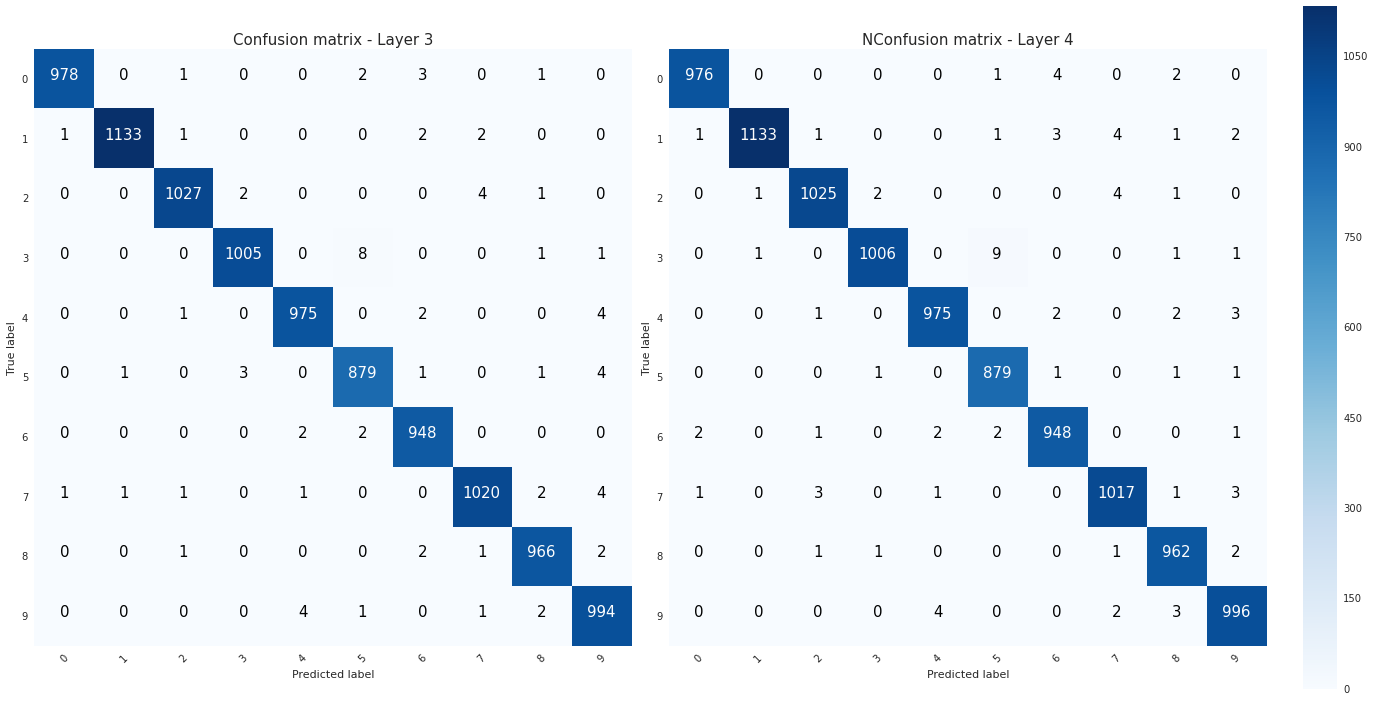

In [31]:
cnn_mnist_train_labels = np.argmax(np.load('features/minist_y_train.npy'), axis=1)
cnn_mnist_test_labels = np.argmax(np.load('features/minist_y_test.npy'), axis=1)
cnn_mnist_test_data4 = np.load('features/minist_x_test_layer4.npy')
cnn_mnist_train_data4 = np.load('features/minist_x_train_layer4.npy')
cnn_mnist_train_data3 = np.load('features/minist_x_train_layer3.npy')
cnn_mnist_test_data3 = np.load('features/minist_x_test_layer3.npy')

np.set_printoptions(precision=2)
print(''.join(['*']*100),'\nExperiment on CNN')
print(''.join(['*']*100),'\nUsing output of Layer 3')
model = BayesClassifier(cnn_mnist_train_data3,cnn_mnist_train_labels,smoothing=1)
preLabel = model.testingOptimized(cnn_mnist_test_data3,cnn_mnist_test_labels,bTestLLH=True,bLabel=True)
cnf_matrix4 = confusion_matrix(preLabel, cnn_mnist_test_labels)
print(''.join(['*']*100),'\nUsing output of Layer 4')
model = BayesClassifier(cnn_mnist_train_data4,cnn_mnist_train_labels,smoothing=1e-1)
preLabel = model.testingOptimized(cnn_mnist_test_data4,cnn_mnist_test_labels,bTestLLH=True,bLabel=True)
cnf_matrix3 = confusion_matrix(preLabel, cnn_mnist_test_labels)
# Compute confusion matrix


plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
EvaluationMetrics.plot_confusion_matrix(cnf_matrix3, classes=np.arange(10),
                      title='Confusion matrix - Layer 3')
# Plot normalized confusion matrix
plt.subplot(1,2,2)
EvaluationMetrics.plot_confusion_matrix(cnf_matrix4, classes=np.arange(10),
                      title='NConfusion matrix - Layer 4')
plt.show()    
#EvaluationMetrics.plotConfusionMatrixModel(preLabel,np.array(cnn_mnist_test_labels))

#### COMMENT

<div class="alert alert-info" style="text-align:justify">

The result seems quite good in both features. However, the features at layer 4 work better than layer 3. It is easy to understand that layer 4 still continue learning more complex structure from the image. In addition, using Bayes classifer which subsitutes last fully connected layer in CNN boost our result the little bit (99.25% and 99.19% correspondingly) </div>

#### CIFAR DATASET AND CNN

<div class="alert alert-info" style="text-align:justify">
Because of personal reason, i still cannot use CNN for CIFAR. However, we should change the network for this dataset. In my CNN notebook, I just still use this lenet with small customization at number of filters and output dimension at each layers. Following the reference, this architect can go up to around 80%. To improve the result more, Residual Neural Network is a state-of-the-art model for image classifcation problem. With CIFAR-10, it can boost the accuracy up to 95%. The detail, you can take a look in here. https://github.com/tensorflow/models/tree/master/resnet </div>

<div class="alert alert-success" style="text-align:justify">
  <strong>CONCLUSION</strong><br><br>
From our experiment, we can see how powerful the Convolutional Neural network is. However, neural network is just like a black box. All of improvement architecture such as CNN, RNN come from the idea of image processing. So we need to understand inside it so that we can modify and improve the network. 
</div>

<br>
<div class="well" style=" margin-bottom: 0px; border-bottom:0px; background-color: #36486b;"> 

<h1 style="color:#f0f0f0"> V. BONUS: Feature Extraction by Bag of Word model</h1></div>

## 5.1 Introduction
-------
As we observe that the main reason that makes our classification worse is the classifer cannot be invariant with the affine transformation, the size and orientation of our object changes in the future (in testing data). In MNIST, the result is much better than CIFAR because our number is placed in the center of the image so that we can use value of pixel as feature. However, it is really bad if we apply for CIFAR. From the images of the class "Car" above, we can easily notice that the car have lot of form, different colors in different backgrounds. In addition, the view and the scale also vary in each picture (front view, rear view, left side and right side). That means the pixel cannot say something general about the class. That leads to the idea we have to find the features which are interest points of the image. 

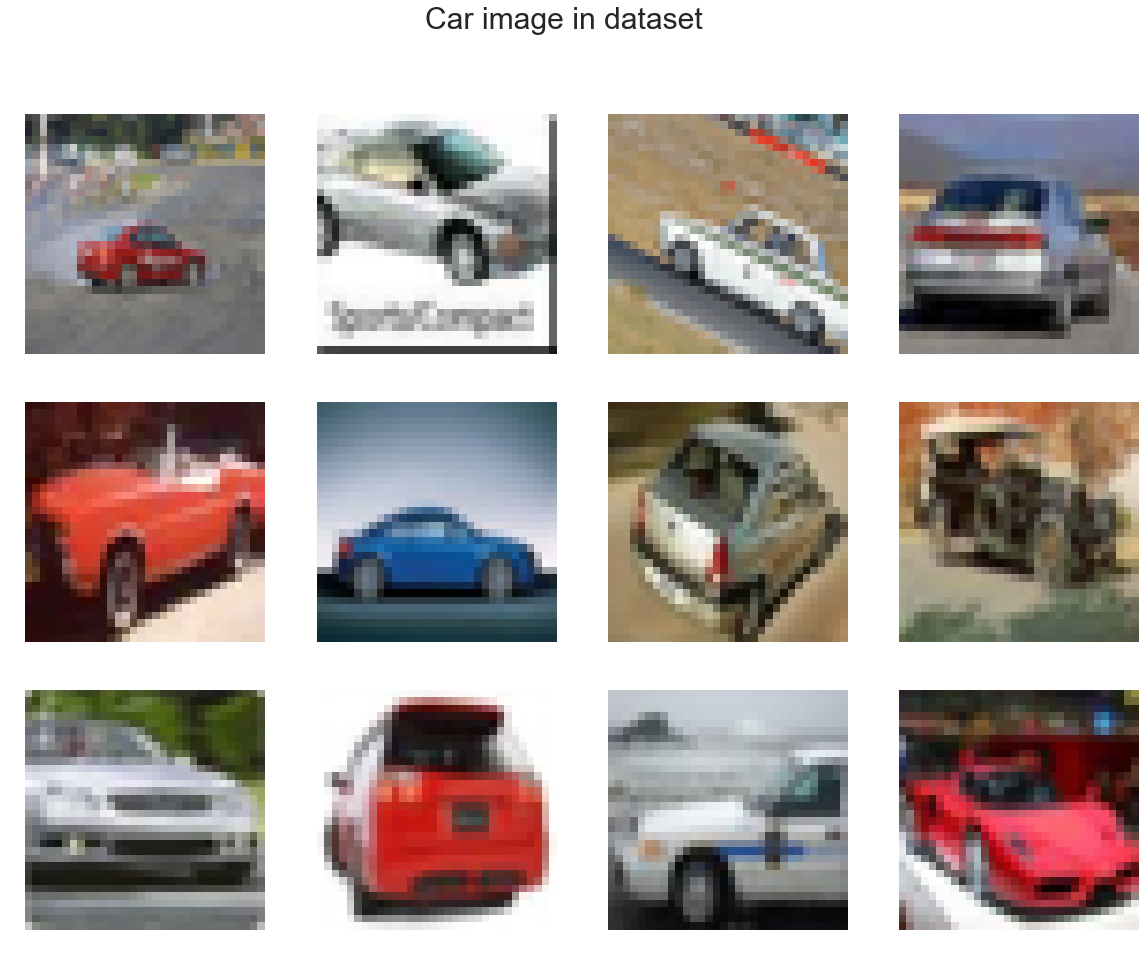

In [12]:
n_pic = 12
fig_height = int(n_pic/4)
cars = training_cifar_images[training_cls==1][[10,11,32,33,38,39,41,42,44,51,54,56]]

fig, ax = plt.subplots(fig_height,4)
fig.set_figheight(5*fig_height)
fig.suptitle('Car image in dataset',fontsize=30)
fig.set_figwidth(20)
for i in range(n_pic):
    plotImage(ax[int(i/4)][i%4],cars[i],'')
plt.show()

## 5.2 SIFT detectors and descriptors and Bag of word Model
-------
The main reason I chose SIFT because it robustly identify. SIFT is invariant even under uniform scaling, orientation, illumination changes, and partially invariant to affine distortion. However, number of features are differen on the imge and how we can use that as the feature. It comes up the idea of Bag of word model. The main ideas is from all features extracted in training set, we will group them into k-clusters (each cluster represents for list of features). Finally, we will represent our image with k-element vector. More detail, You can see in the Bag Of Word notebook.  In this experiment, I use codebook with 100 words with tf-idf weighting to represent our image. 

To run this model, you need to download features extracted using codebook 1000 words in here: https://drive.google.com/drive/folders/0Bxk-xCNz8VClZEs5YVFoV3MyZEE?usp=sharing


In [14]:
bow_cifar_train_data = np.load('features/BoW_train_log_1000.npy')
bow_cifar_train_labels = np.load('features/BoW_train_labels.npy')

[CIFAR_train_data,CIFAR_train_labels,CIFAR_validate_data,CIFAR_validate_labels] = \
                DataPreprocessing.train_validate_split(bow_cifar_train_data,bow_cifar_train_labels,0.8,0.2)

Mode: Batch - Accuracy = 28.400000% - Test likelihood = -106.434111 in 16.841015 seconds


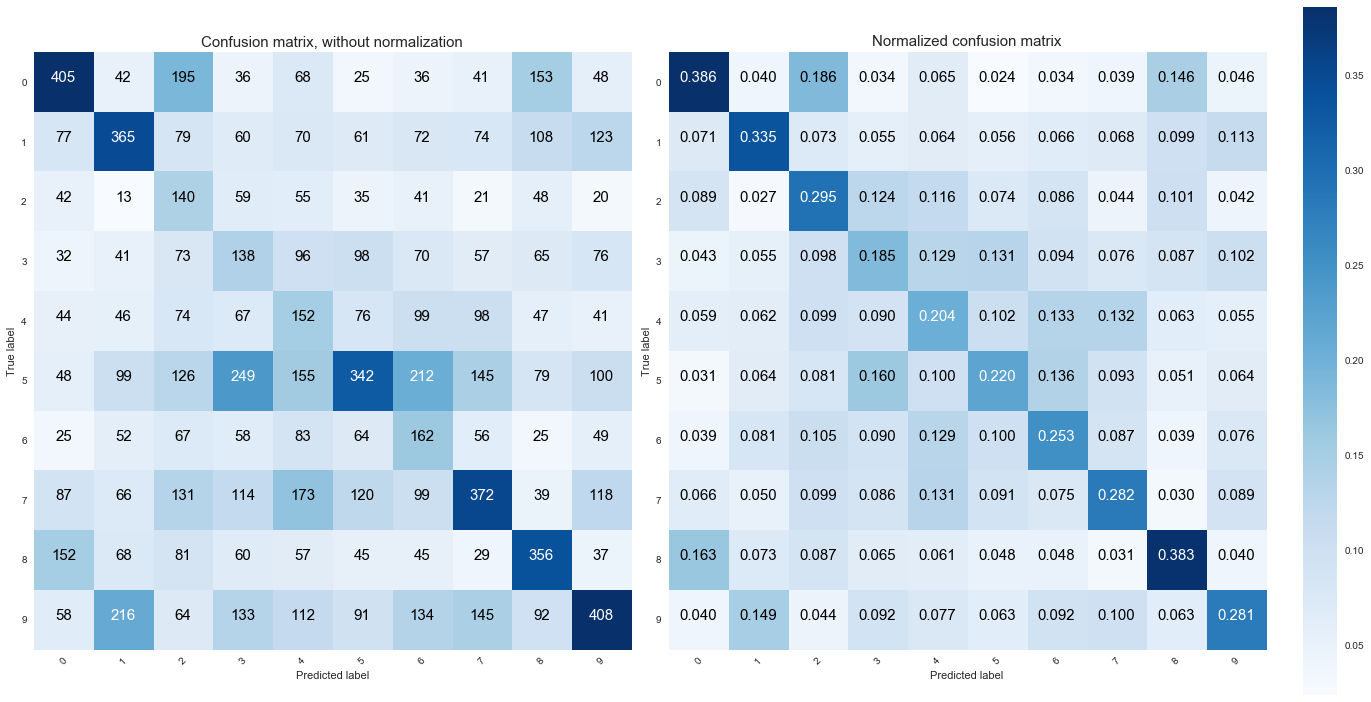

In [15]:
model = BayesClassifier(CIFAR_train_data,CIFAR_train_labels,bRmUseless=True,smoothing=1e-5,iRmThreshold=0)
preLabel = model.testingOptimized(CIFAR_validate_data,CIFAR_validate_labels,bTestLLH=True,bLabel=True)
# Compute confusion matrix
EvaluationMetrics.plotConfusionMatrixModel(preLabel,np.array(CIFAR_validate_labels))

#### COMMENT

<div class="alert alert-info" style="text-align:justify">The result is worse than using pixel as feature (25% and 54% correspondingly). It makes me raise the consideration about this feature. From the research, I know that, SIFT detector use **Laplacian of Gaussian** on **multiple scale** of the image to detect the edge and blob from image. From image in CIFAR dataset, we saw that the objects are not clear enough to see the edge and it is impossible to gradient to detect the edge of the object. In addition, the image size is 32x32 so scaling in this case is terrible because we will lose huge information of the image if we scale down. It is one of the reason why SIFT is not a good way to represent the image. However, I found some interesting thing in next experiment that we test with training data. </div>

Mode: Batch - Accuracy = 83.132500% - Test likelihood = -12.402433 in 68.550027 seconds


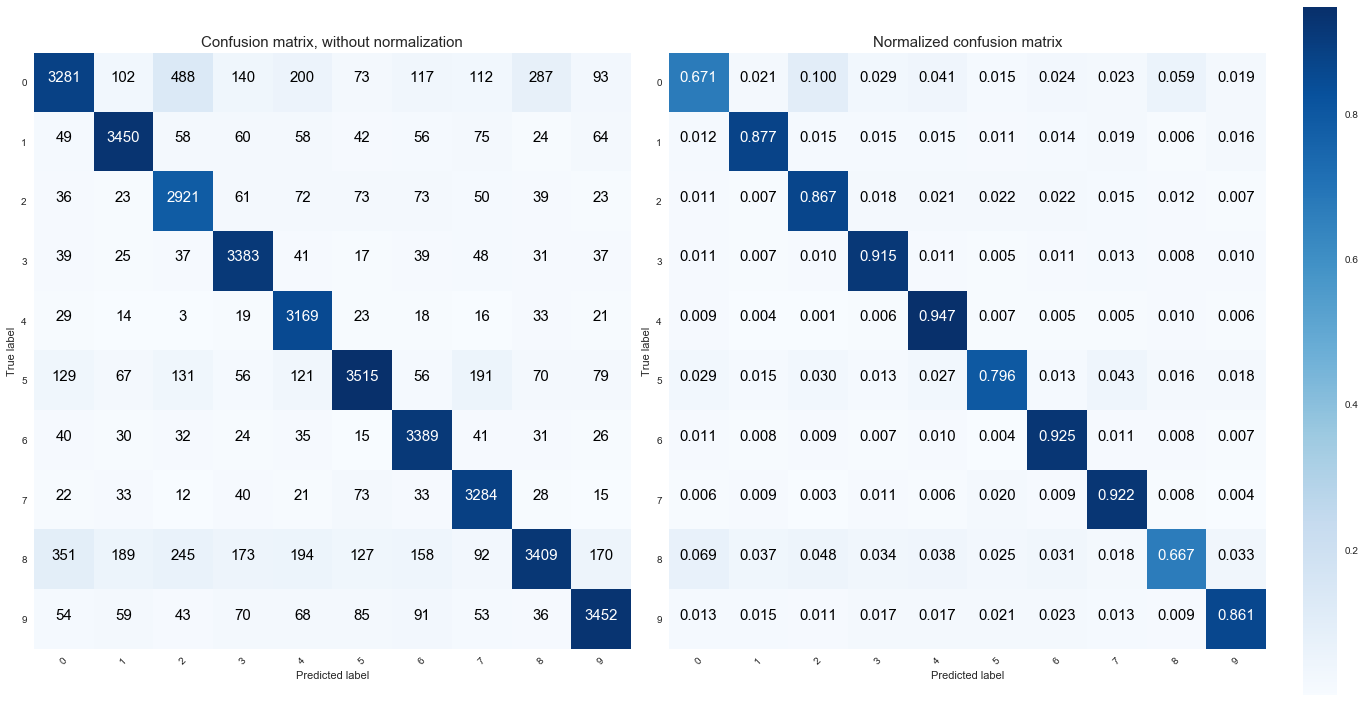

In [16]:
preLabel = model.testingOptimized(CIFAR_train_data,CIFAR_train_labels,bTestLLH=True,bLabel=True)
EvaluationMetrics.plotConfusionMatrixModel(preLabel,np.array(CIFAR_train_labels))

#### COMMENT

<div class="alert alert-info" style="text-align:justify">In this case, the result is quite good for training set (80%). Does the model overfit with training data?To understand more, I try with smaller dataset (10.000 images) and see the result.</div>

Mode: Batch - Accuracy = 99.950000% - Test likelihood = -0.151437 in 14.643007 seconds


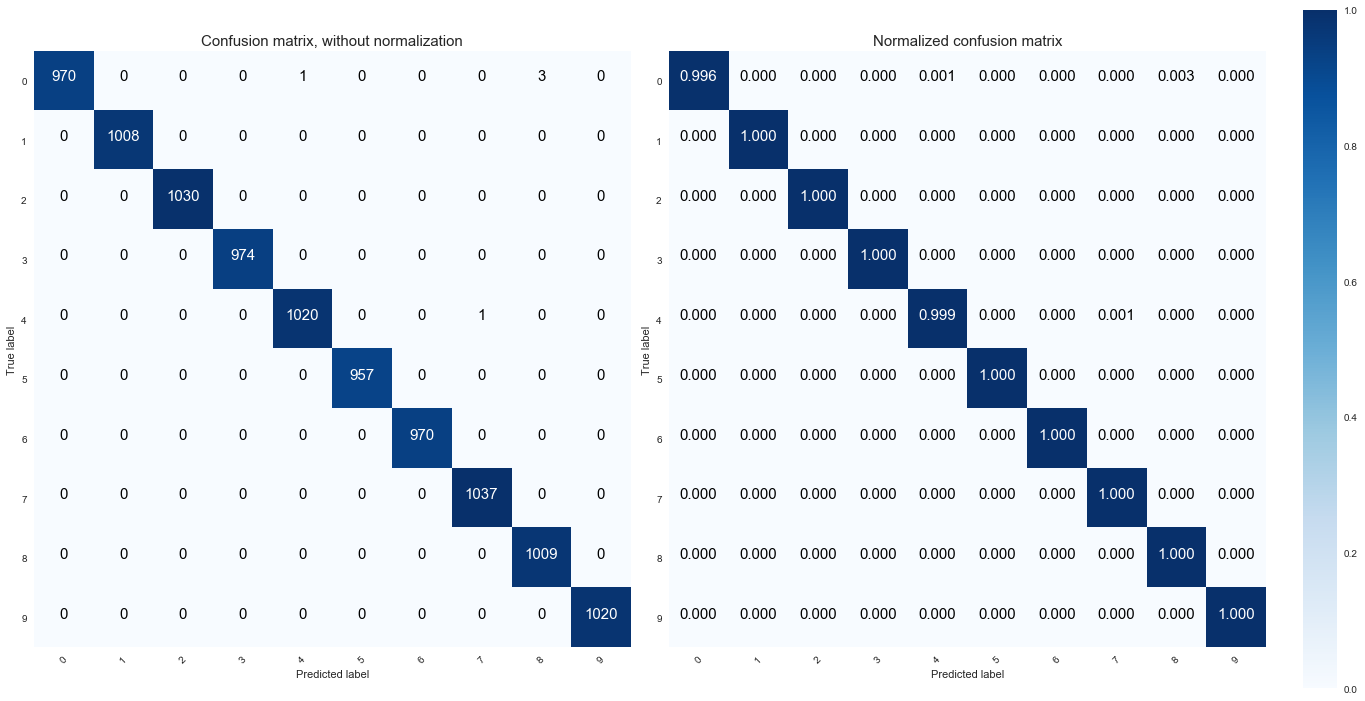

In [32]:
model = BayesClassifier(CIFAR_validate_data,CIFAR_validate_labels,bRmUseless=True,smoothing=1e-5,iRmThreshold=0)
preLabel = model.testingOptimized(CIFAR_validate_data,CIFAR_validate_labels,bTestLLH=True,bLabel=True)
# Compute confusion matrix
EvaluationMetrics.plotConfusionMatrixModel(preLabel,np.array(CIFAR_validate_labels))

#### COMMENT
<div class="alert alert-info" style="text-align:justify">The result come to 1. It is quite interesting. To explain this, we have to come up with idea of Bag of word and bayes classifer. With BoW and SIFT, we hope that the image that belongs to sepcific class will have same features so that we have the dimension that clearly seperate our class with other class. </div>

In [33]:
model = NaiveBayesClassifier(CIFAR_train_data,CIFAR_train_labels,bRmUseless=True,smoothing=1e-5,iRmThreshold=0)

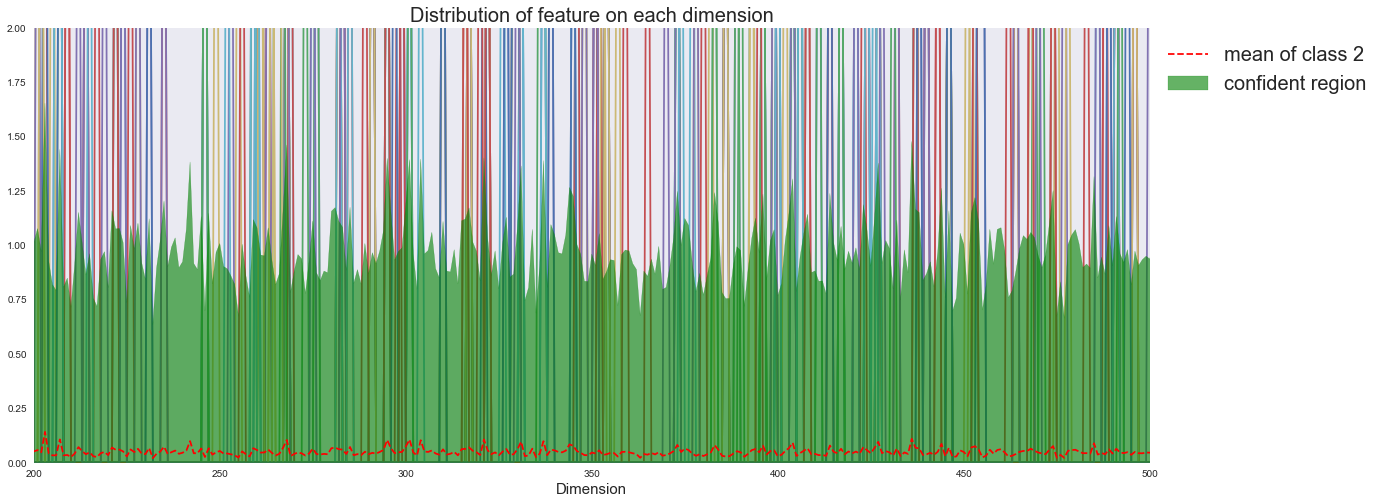

In [76]:
from random import shuffle
## Class ID
i = 2

## get data for the class
y  = bow_cifar_train_data[bow_cifar_train_labels==i]
shuffle(y)

## visualization
plt.figure(figsize=(20,8))

x = np.arange(model.nDim)
# BoW training data
for j in range(100):
    plt.plot(x,y[j],zorder=0)

# mean value with +- 2*std 
y_mean = model.componentPrior[i][0]
y_cov = np.sqrt(model.componentPrior[i][1])
plt.plot(x,y_mean,'--r',zorder=2, label='mean of class %d'%(i))
plt.fill_between(x, y_mean-2*y_cov, y_mean+2*y_cov,color='g',alpha=0.6,zorder=1,label='confident region')


plt.title('Distribution of feature on each dimension',fontsize=20)
plt.xlabel('Dimension',fontsize=15)
plt.xlim(200,500)
plt.ylim(0,2)
plt.grid(False)
plt.legend(fontsize=20,bbox_to_anchor=(1, 1), loc=2)
plt.show()

#### COMMENT

<div class="alert alert-info" style="text-align:justify"> The graph above show you the distribution of the feaure in "class 2", they are across over the dimension. Specially the small peaks in the red line is not much different with other dimensions. The graph below shows you the image that share same feature, the maximum number of shared-feature on the dimension is only around 175, compared with 5000, number of images in the class.</div>

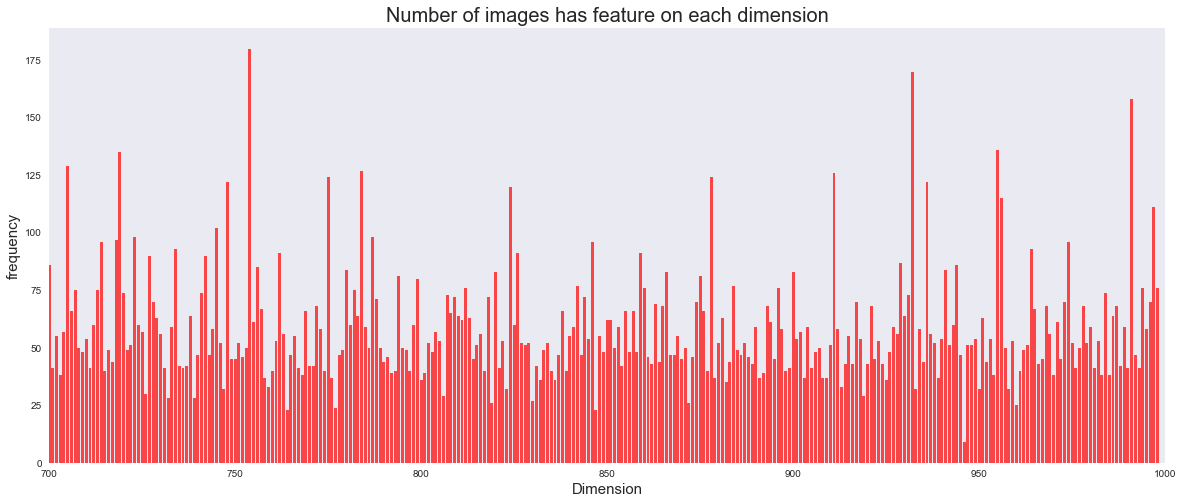

In [72]:
plt.figure(figsize=(20,8))
y  = np.sum(bow_cifar_train_data[bow_cifar_train_labels==i]!=0,axis=0)
plt.bar(x,y,color='r',alpha=0.7,zorder=2)
plt.xlim(700,1000)
plt.grid(False)
plt.title('Number of images has feature on each dimension',fontsize=20)
plt.xlabel('Dimension',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.show()


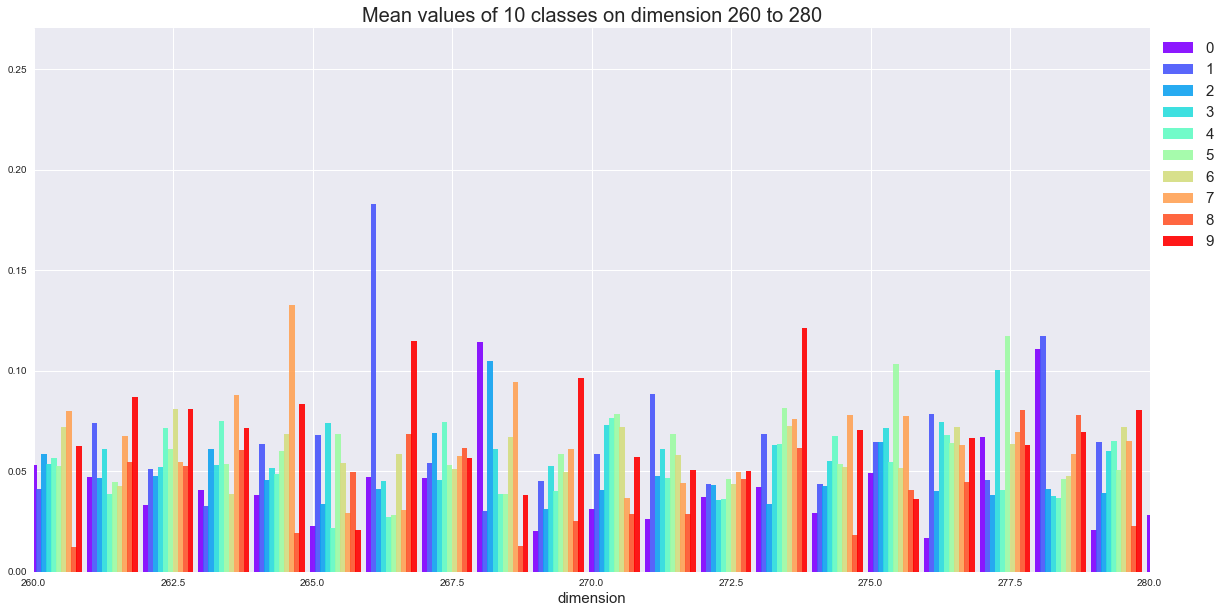

In [89]:
plt.figure(figsize=(20,10))
colors = iter(cm.rainbow(np.linspace(0,1,10)))
x = np.arange(model.nDim)
plt.xlim(260,280)
for j in range(10):
    plt.bar(x+0.09*j,model.componentPrior[j][0],color = next(colors),alpha=0.9,width=0.1,label=str(j))
    #plt.scatter(x,model.componentPrior[j][0],c = next(colors),alpha=0.5,label=str(j))
plt.legend(loc=2,fontsize=15,bbox_to_anchor=(1, 1))
plt.xlabel('dimension',fontsize=15)
plt.title('Mean values of 10 classes on dimension 260 to 280',fontsize=20)
plt.show()

In [110]:
frequencyDims = []
for i in range(10):
    frequencyDims.append(np.sum(bow_cifar_train_data[bow_cifar_train_labels==i]!=0,axis=0))
frequencyDims = np.array(frequencyDims)

sumFrequencyDims = np.sum(frequencyDims,axis=0)
max_idx = np.argsort(sumFrequencyDims)[::-1]

In [130]:
import pandas as pd
pd.DataFrame(frequencyDims[:,max_idx[:10]]/sumFrequencyDims[max_idx[:10]],
             index=['Class '+str(i) for i in np.arange(10)], columns=['Dim '+str(i) for i in max_idx[:10]])

,Dim 468,Dim 745,Dim 24,Dim 444,Dim 301,Dim 844,Dim 112,Dim 842,Dim 393,Dim 321
Class 0,0.125100,0.090617,0.197196,0.071157,0.062257,0.083008,0.088734,0.056943,0.035389,0.057692
Class 1,0.116335,0.095429,0.115888,0.130930,0.134241,0.076172,0.076770,0.066933,0.065723,0.123482
Class 2,0.074104,0.081796,0.094393,0.095825,0.133268,0.070312,0.057827,0.076923,0.077856,0.127530
Class 3,0.088446,0.106656,0.030841,0.092030,0.114786,0.097656,0.125623,0.143856,0.177958,0.113360
Class 4,0.062948,0.109864,0.033645,0.054080,0.059339,0.081055,0.067797,0.072927,0.047523,0.037449
Class 5,0.068526,0.095429,0.019626,0.086338,0.102140,0.098633,0.140578,0.186813,0.267947,0.118421
Class 6,0.050199,0.068966,0.033645,0.084440,0.125486,0.106445,0.096710,0.086913,0.118301,0.124494
Class 7,0.075697,0.075381,0.062617,0.088235,0.061284,0.099609,0.114656,0.105894,0.091001,0.078947
Class 8,0.177689,0.160385,0.276636,0.128083,0.071012,0.104492,0.112662,0.126873,0.071790,0.066802
Class 9,0.160956,0.115477,0.135514,0.168880,0.136187,0.182617,0.118644,0.075924,0.046512,0.151822


#### COMMENT
I try  to filter some dimensions which have highest number of images shared same feature and calculate how percentage of each class in those dimension. As you can see from the table that, There are 2 or more classes have similar number of images in each dimension. Until now, it is still hard to give the conclusion. In my opinion, we need to do more experiment to explain this problem. From my experiment, I can comment something:
- First, mean value of the class on each dimension is too close to other classes and much smaller than the value in the vector of image. That create very light difference between 2 pdf
- Second, SIFT detector is not good that causes the interest points are not unique and featured for the class. That reduce the discriminative aspects between 2 classes on some dimensions. 
- Last, I think we should try this method again with high-quality image to examine and understand more about our problem.

P/s: In this model, I also use different term frequency method to compare the efficiency between them. However, the result is not good as I expect so it is not useful to compare them in here. More information, you can read in Bag of Word model notebook.

<div class="alert alert-success" style="text-align:justify">
  <strong>CONCLUSION</strong><br><br>
  Feature Extraction with Bag Of Words representation is a potential method because it reduces the problem of variance in scaling, orientation, illumination changes, or affine distortion. However, CIFAR image is low-quality so it is hard to extract the good feature and represent those image by BoW model. In addition, from this experiment I know that the Naive Bayes is quite sensitive and can be trapped into overfitting problem. 
</div>